<a href="https://colab.research.google.com/github/Tanaya0211/Supplement-Sales-Prediction/blob/main/Supplement_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Downloading the necesary libraries
!pip install proplot

# Importing the necesary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt                       # Fonts 
from scipy import stats                      # Remove outliers
import matplotlib.ticker as ticker           # Modify axis
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [8]:
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

In [3]:
# Importing data
train = pd.read_csv('/content/TRAIN.csv')
test = pd.read_csv('/content/TEST_FINAL.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
# Rename the values on "Discount" 
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})

In [5]:
# Data types
print('Data type per variable:')
print(train.dtypes)

Data type per variable:
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object


In [6]:
# Changing data types
train[['Store_id', 'Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(object)
train['Date'] = pd.to_datetime(train.Date)

In [17]:
for i in train[['Store_id','Store_Type','Location_Type','Region_Code']]:
  res=train[i].unique()
  print(sorted(res))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [18]:
# Do we have duplicates?
print('Number of duplicates:', len(train[train.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


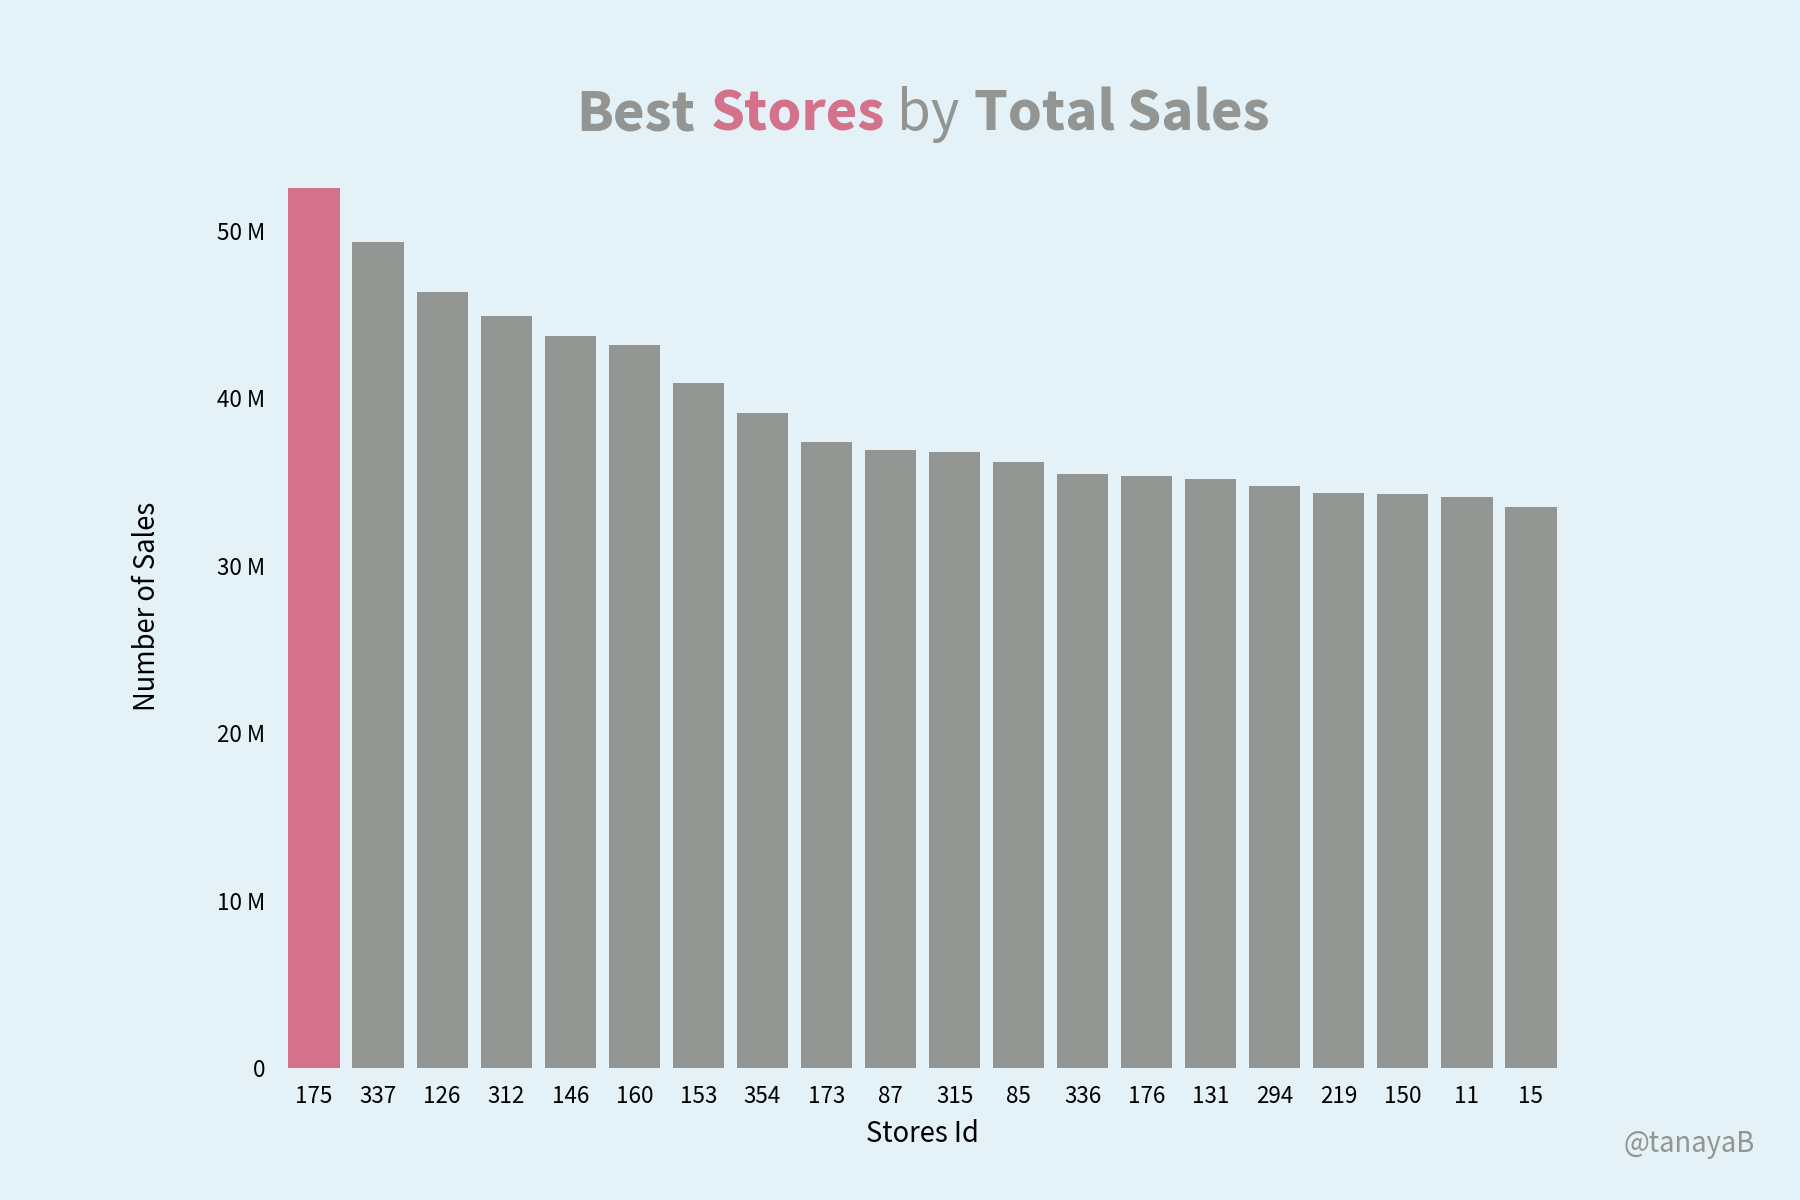

In [20]:
# Which are the best stores (by number of sells)?
best_stores = train.groupby(['Store_id'], as_index=False)['Sales'].sum()        # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)                                               # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')
# For changing colors
col1 = best_stores.head(1)
col2 = best_stores.tail(19)

ax.bar(col1.Store_id, col1.Sales, color = '#d4728c')
ax.bar(col2.Store_id, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
# Title
plt.text(4.1, 56000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(6.2, 56000000, "Stores", size=22, color="#d4728c", fontweight="bold")
plt.text(9.1, 56000000, "by", size=22, color="grey")
plt.text(10.3, 56000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@tanayaB", fontsize=11, ha="right", color='grey');

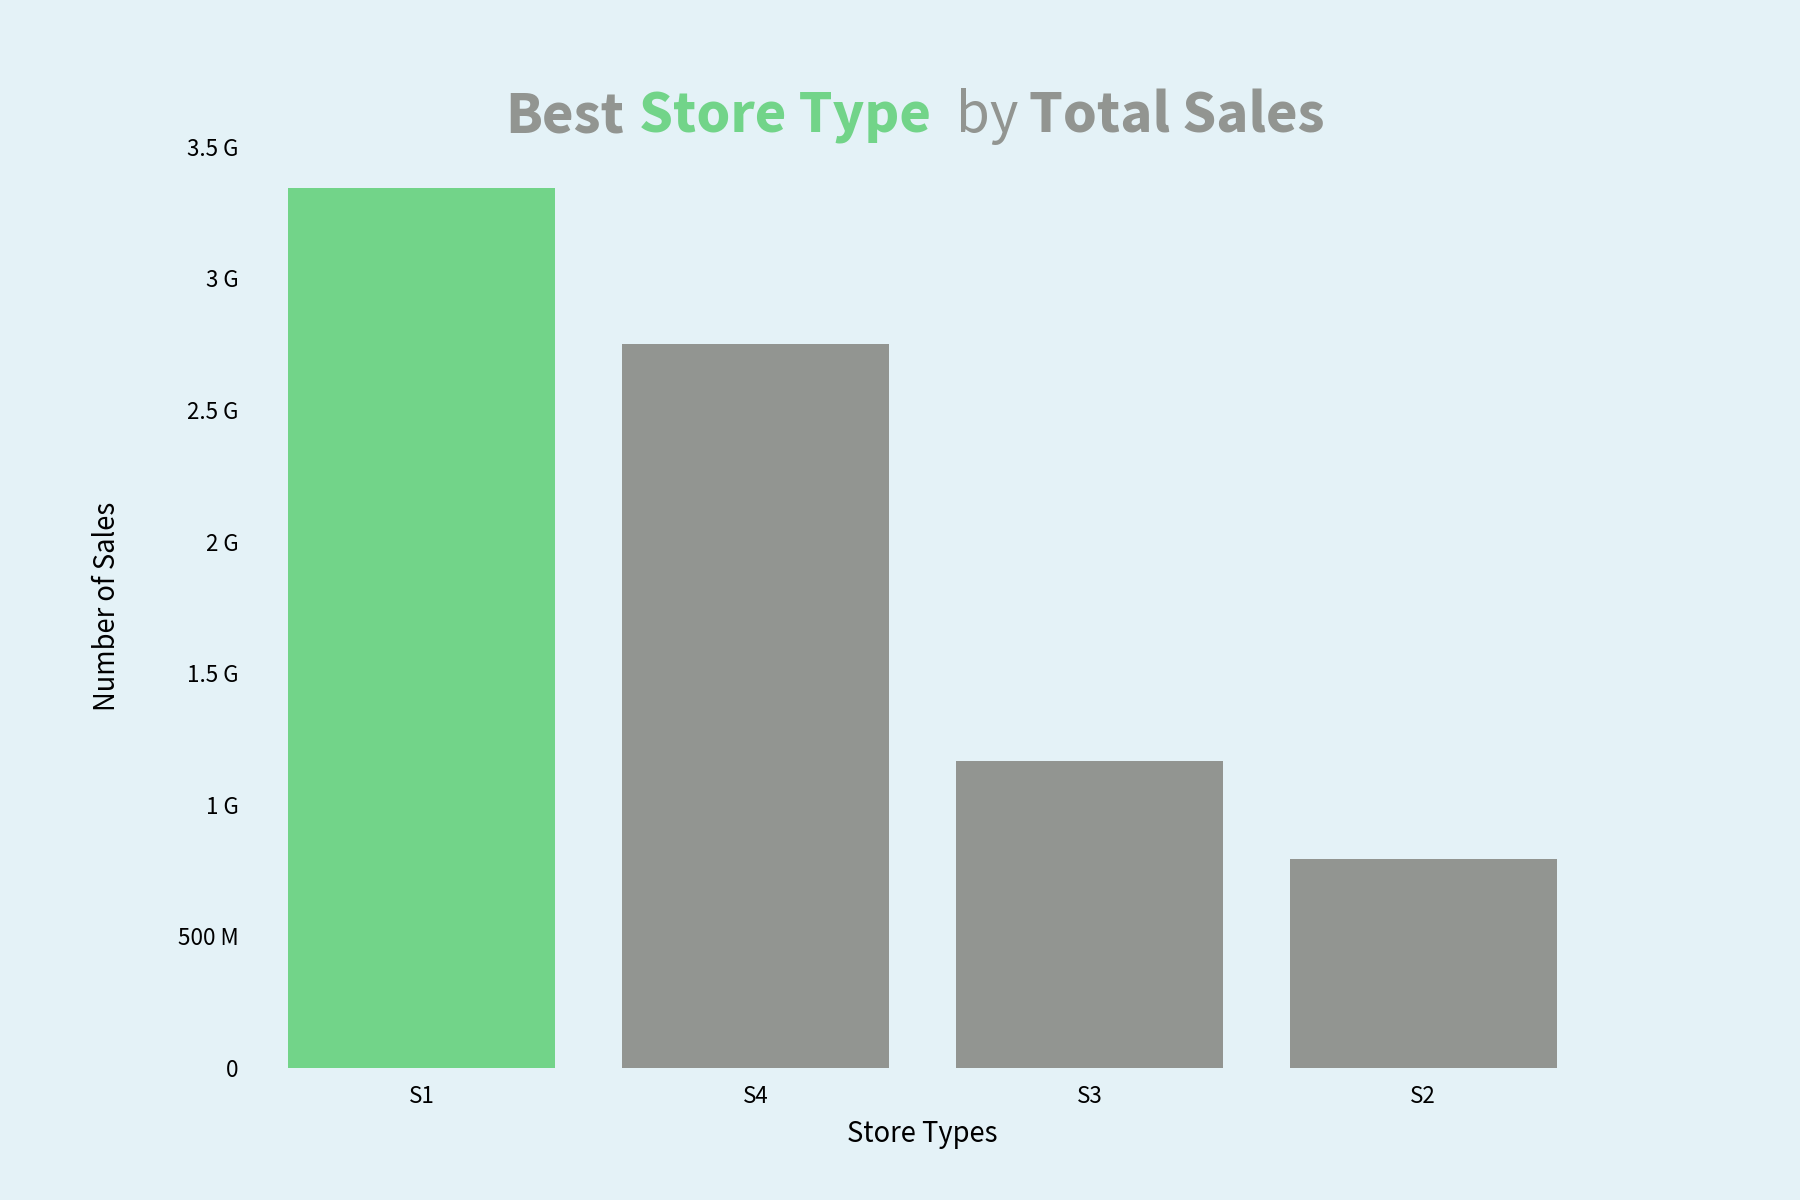

In [21]:
# Which are the best store types (by number of sales)?
best_store_type = train.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')
# For changing colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.65, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.6, 3555000000, "by", size=22, color="grey")
plt.text(1.82, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@tanayaB", fontsize=11, ha="right", color='grey');

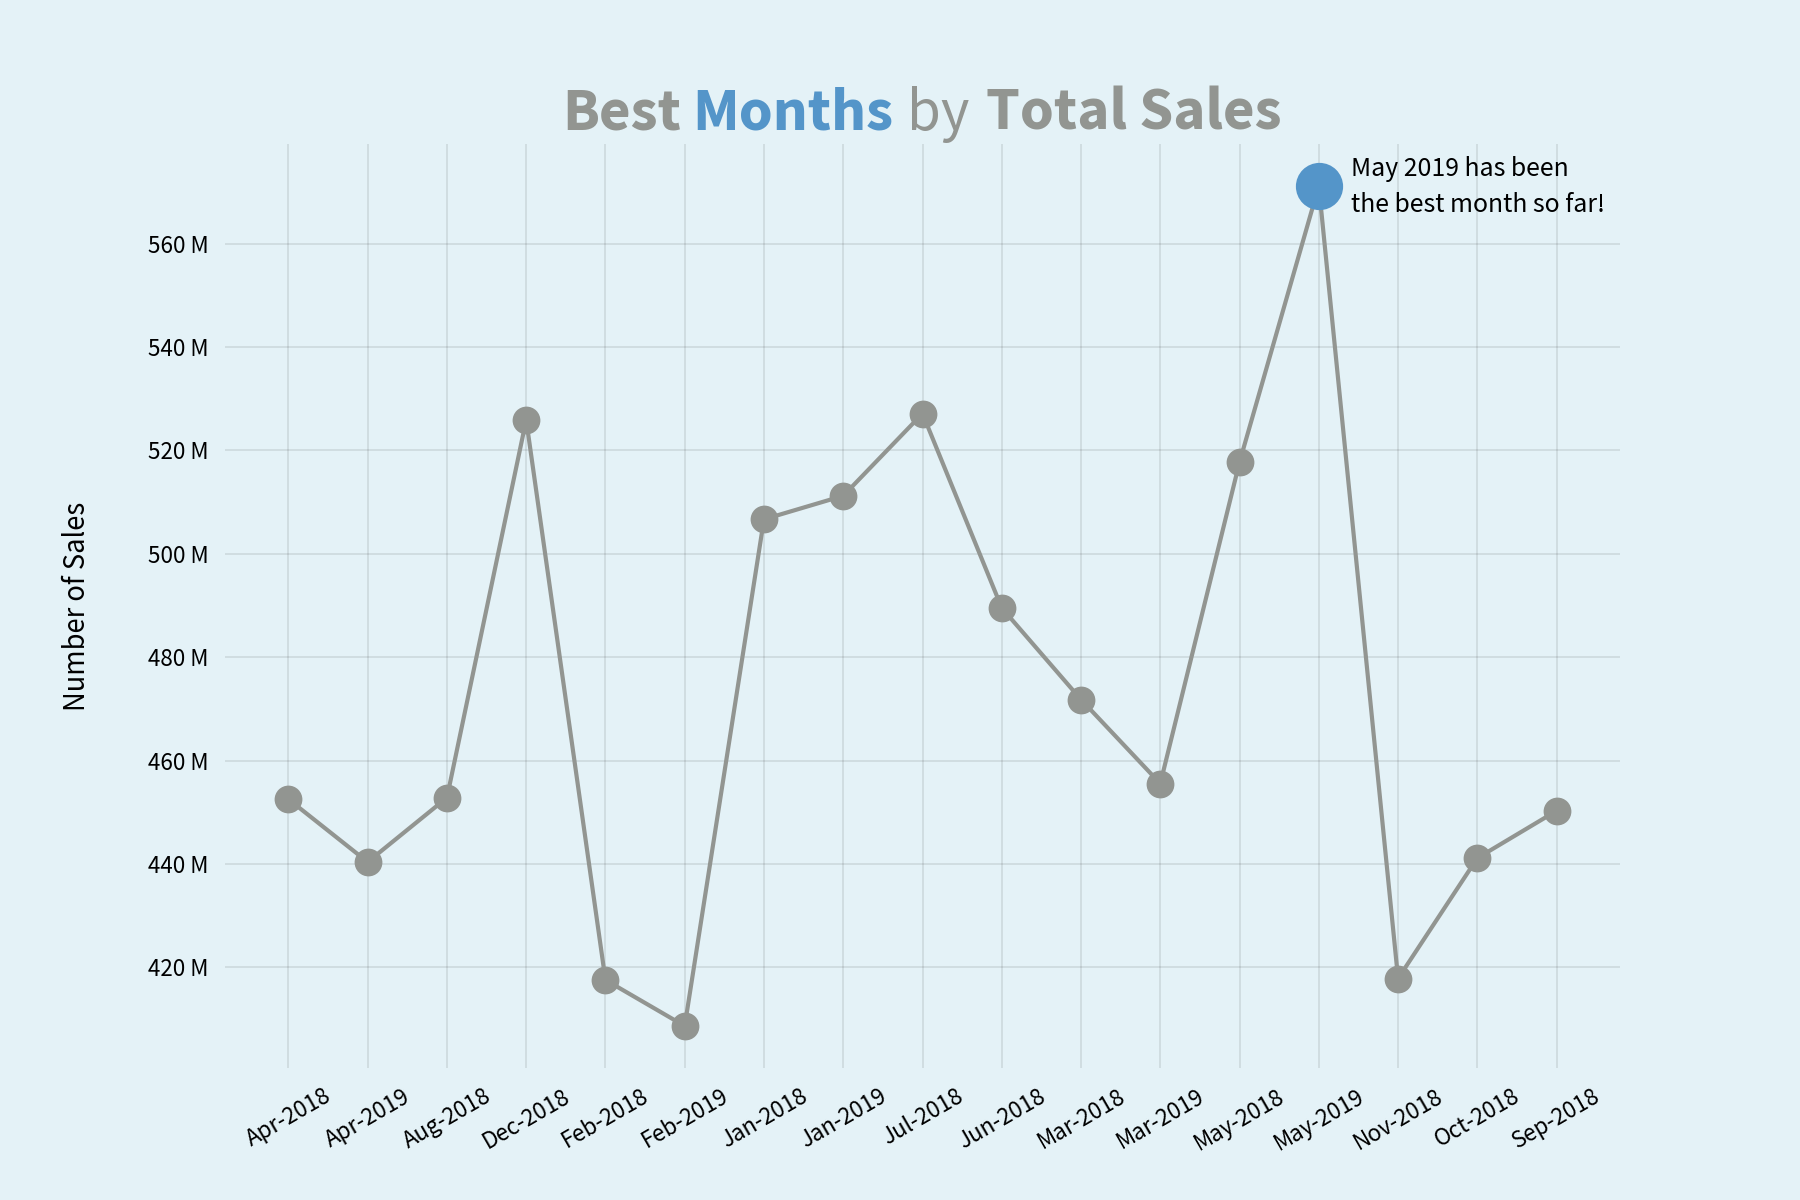

In [22]:
# Best months by sells
best_month = train.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Annotations
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)


# Title
plt.text(3.45, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(5.1, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(38, 43000, "@tanayaB", fontsize=11, ha="right", color='grey');

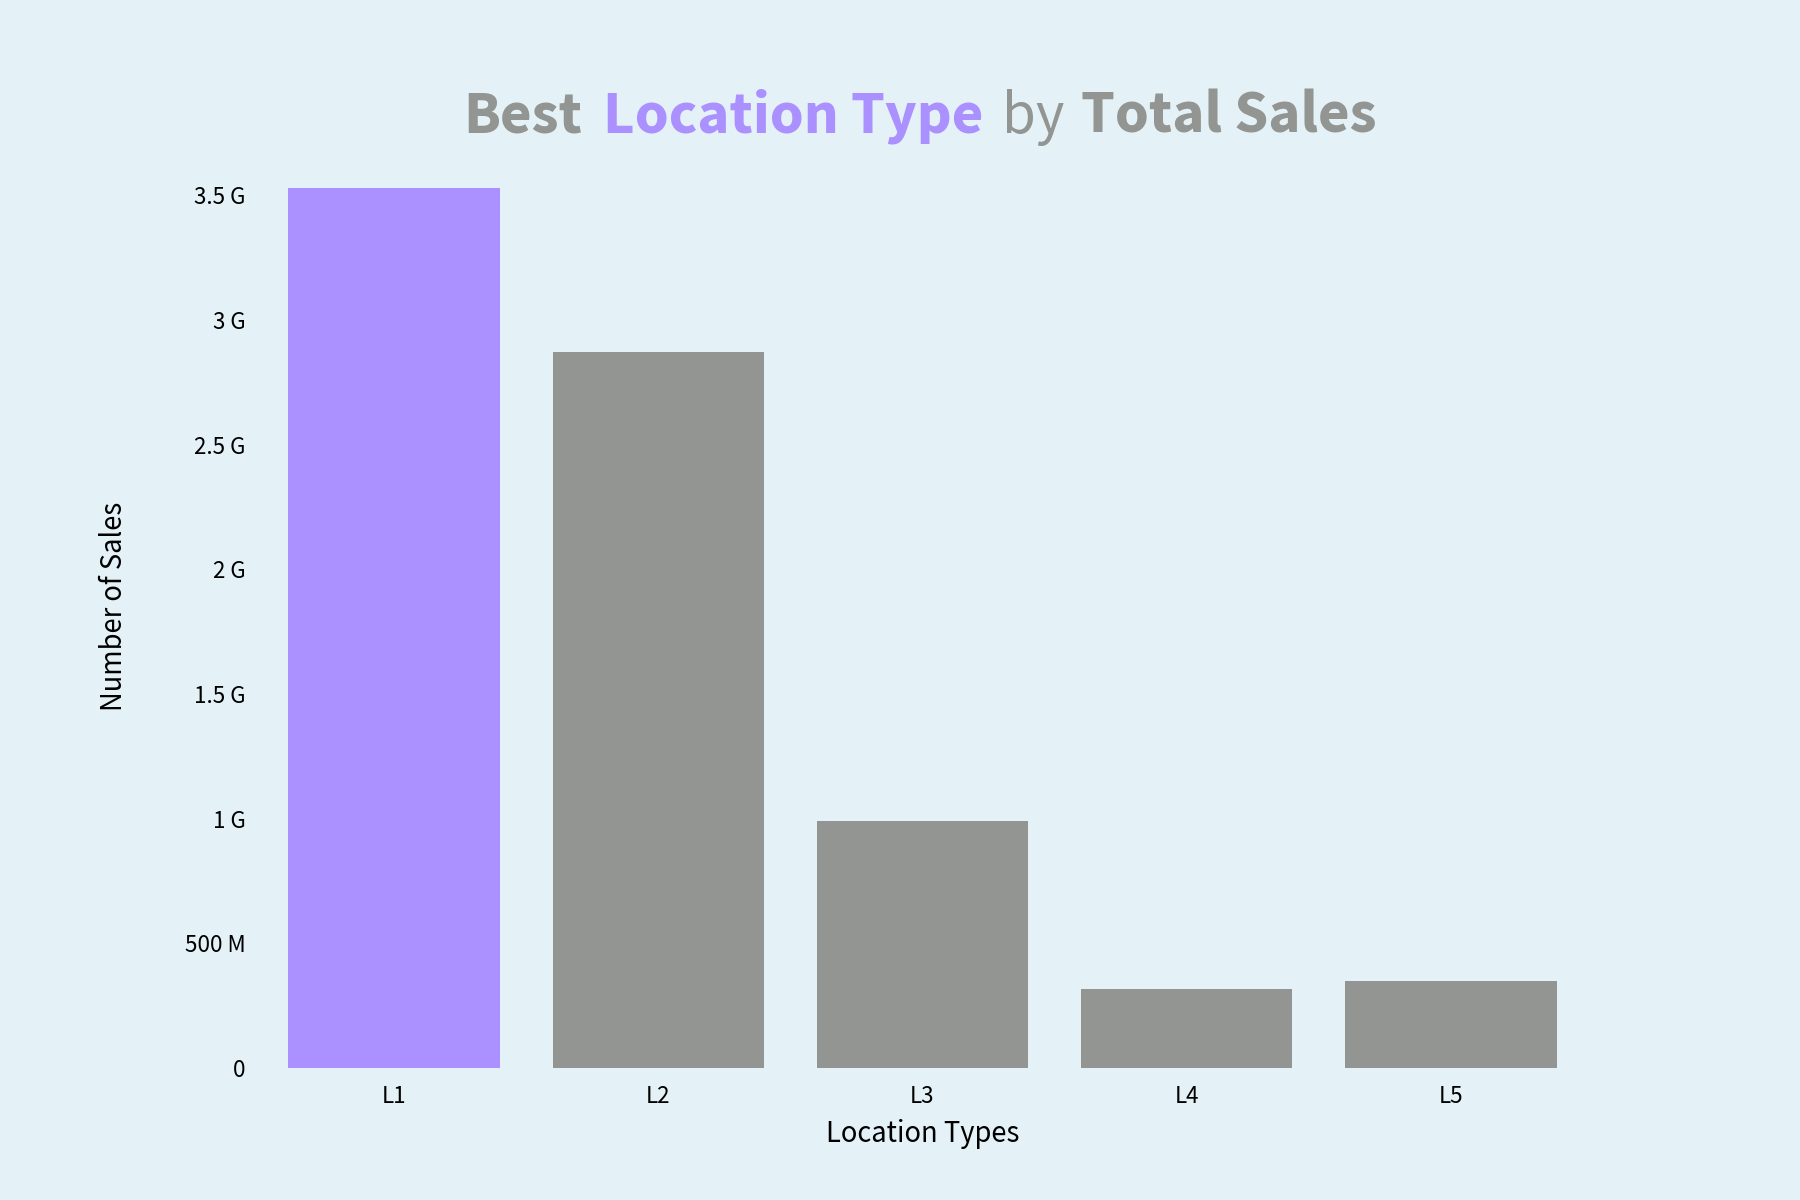

In [24]:
# Which are the best locations (by number of sales)?
best_location = train.groupby(['Location_Type'], as_index=False)['Sales'].sum()    
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_location.head(1)
col2 = best_location.tail(4)
ax.bar(col1.Location_Type, col1.Sales, color = '#ab90ff')
ax.bar(col2.Location_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Location Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
# Title
plt.text(0.26, 3750000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3750000000, "Location Type", size=22, color="#ab90ff", fontweight="bold")
plt.text(2.3, 3750000000, "by", size=22, color="grey")
plt.text(2.6, 3750000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

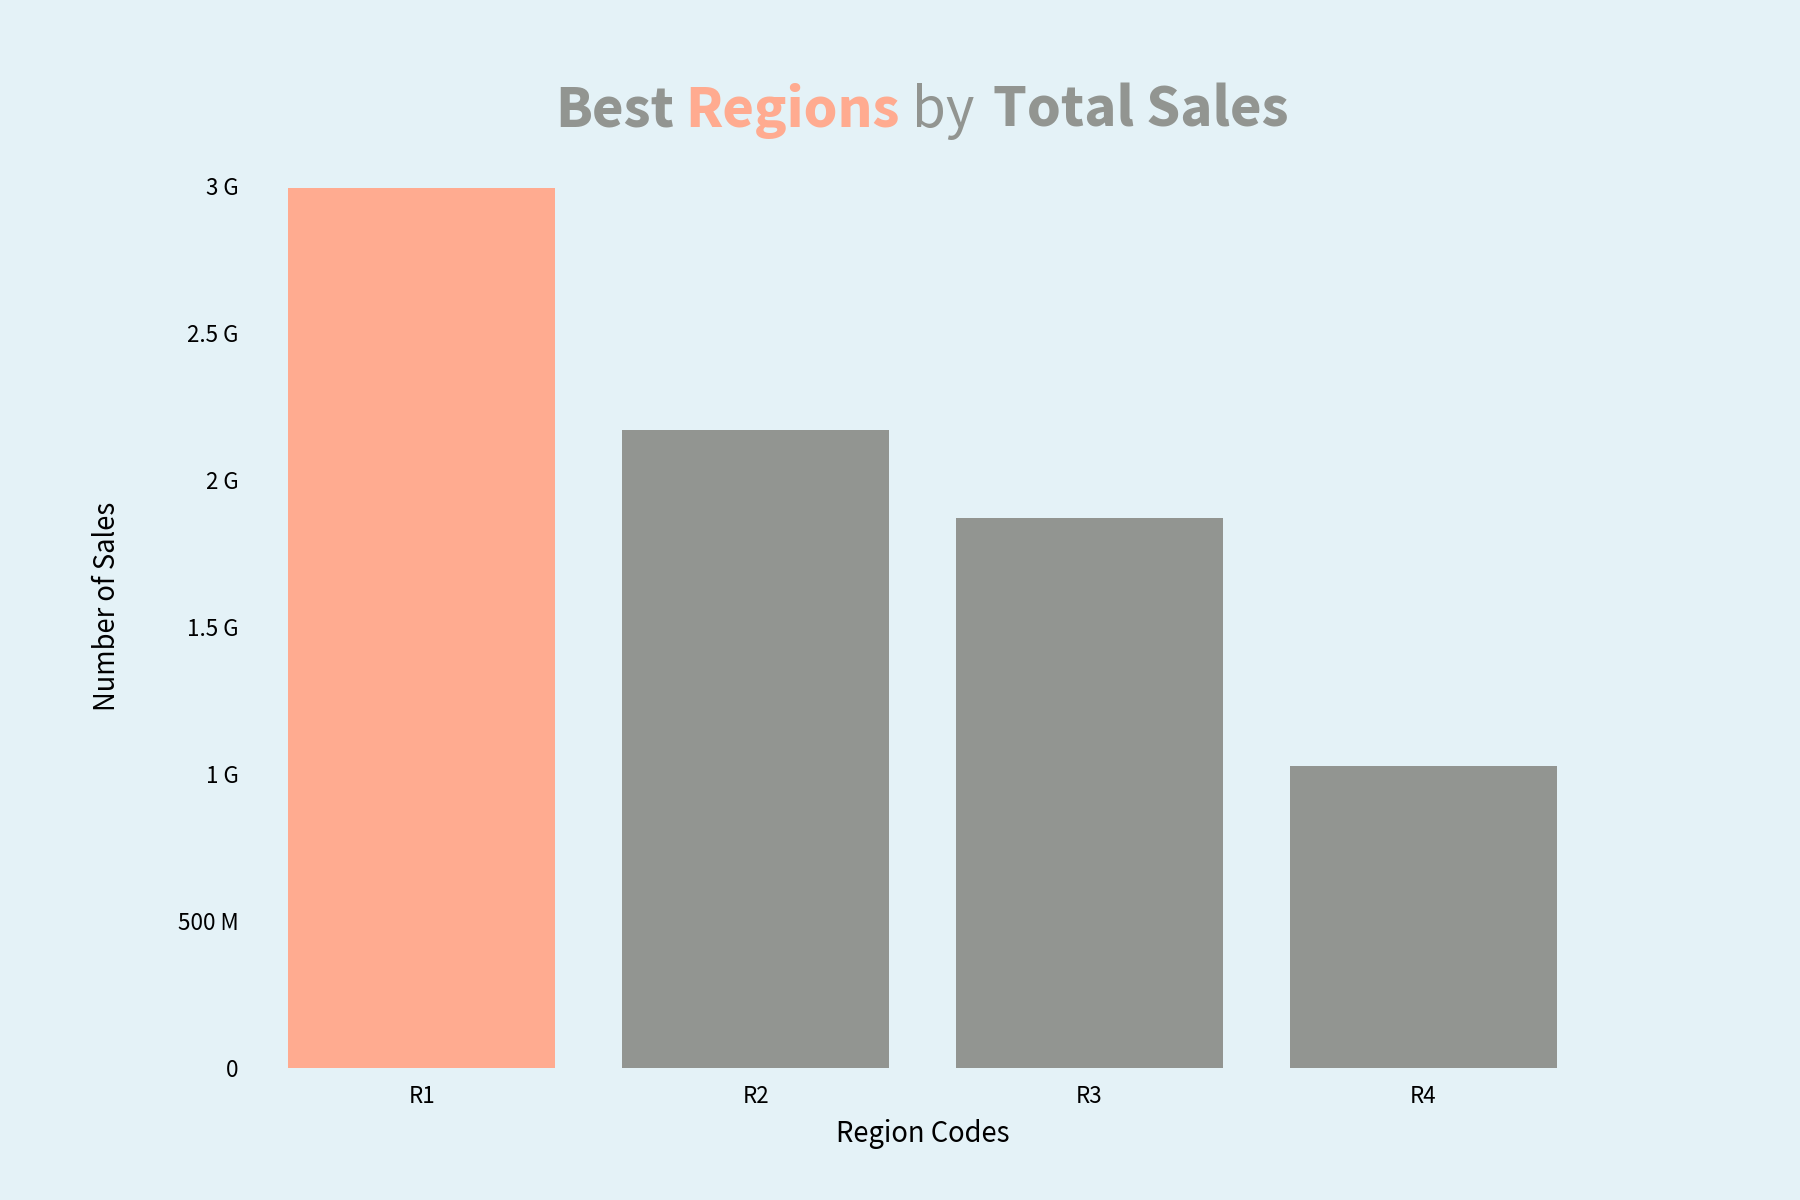

In [25]:
# Which are the best regions (by number of sales)?
best_region = train.groupby(['Region_Code'], as_index=False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)

ax.bar(col1.Region_Code, col1.Sales, color = '#ffab90')
ax.bar(col2.Region_Code, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
# Title
plt.text(0.4, 3200000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3200000000, "Regions", size=22, color="#ffab90", fontweight="bold")
plt.text(1.47, 3200000000, "by", size=22, color="grey")
plt.text(1.71, 3200000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

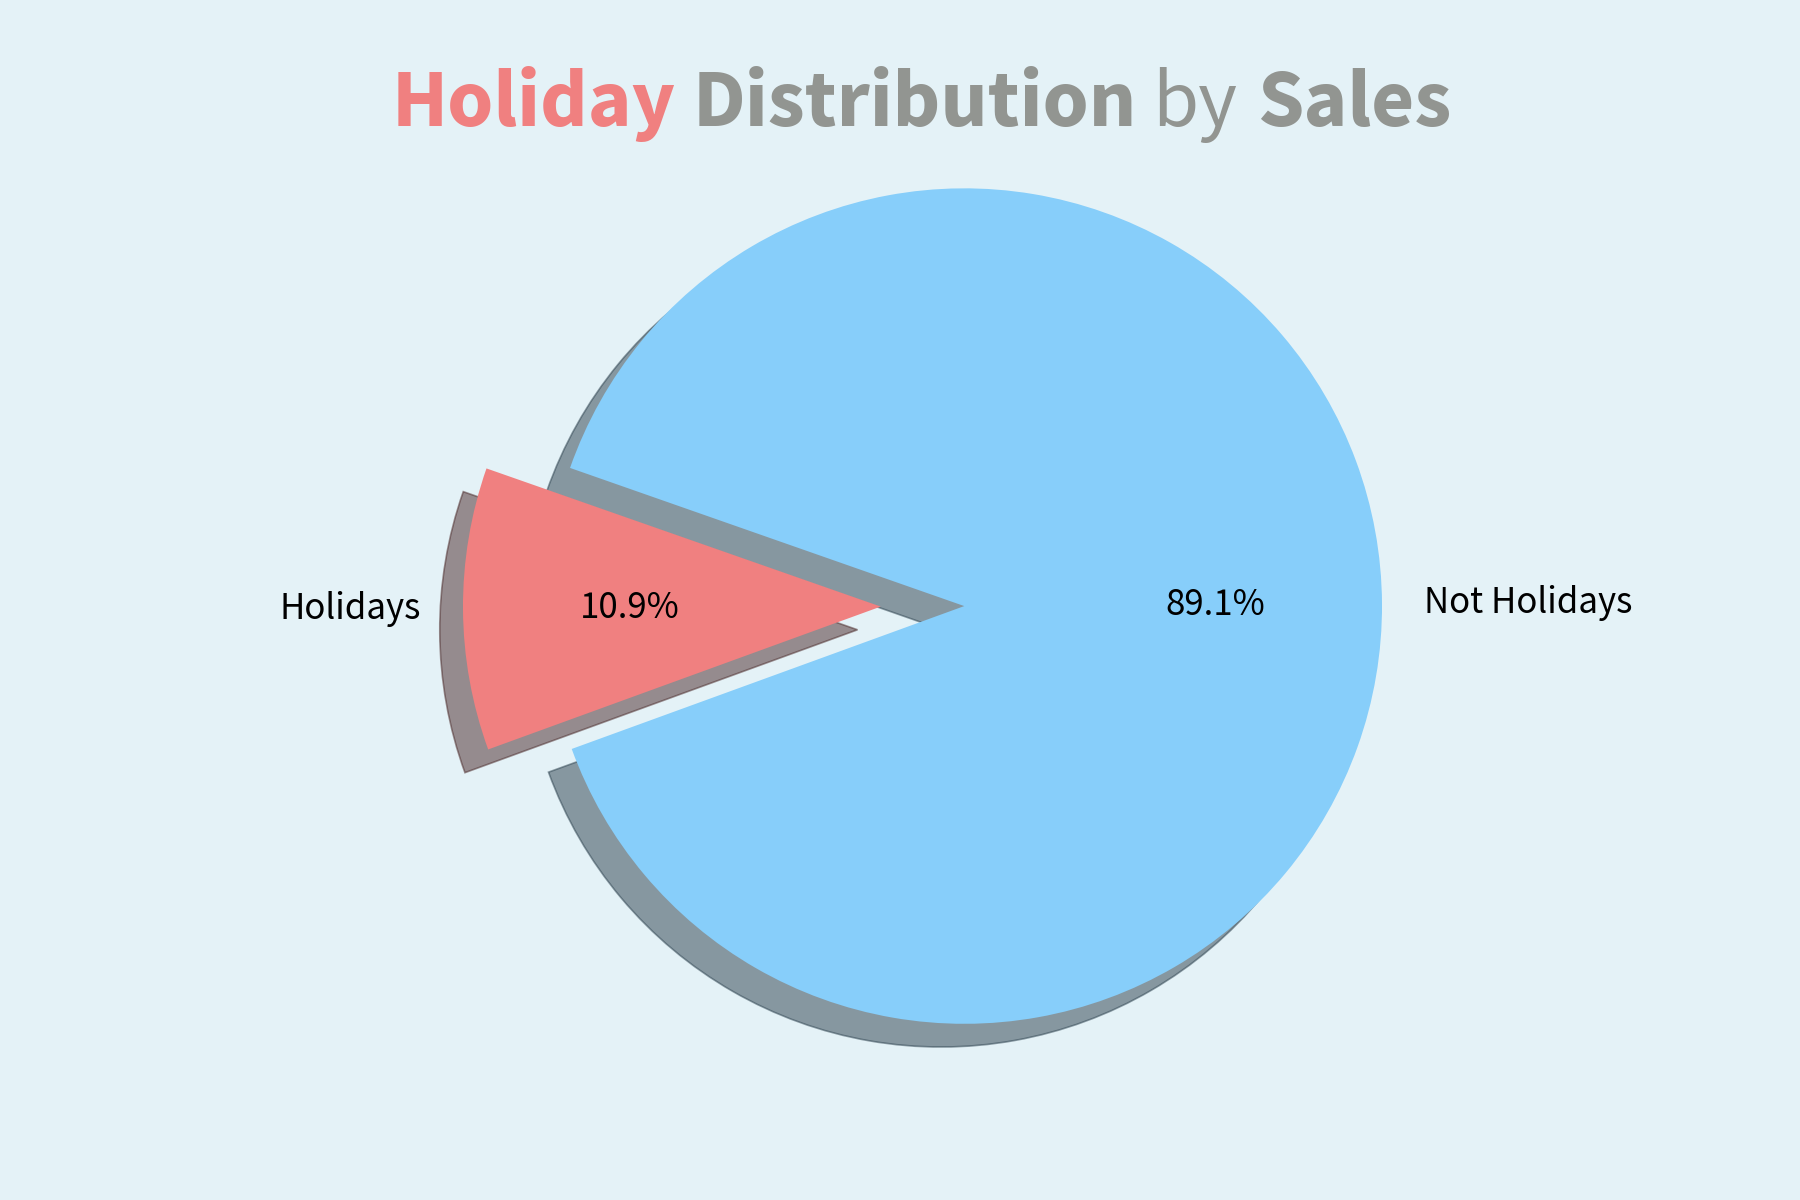

In [26]:
# Holidays Distribution
holiday = train.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')

plt.text(-1.17, 1.15, "Holiday", size=30, color="lightcoral", fontweight="bold")
plt.text(-0.45, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.65, 1.15, "by", size=30, color="grey")
plt.text(0.9, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()

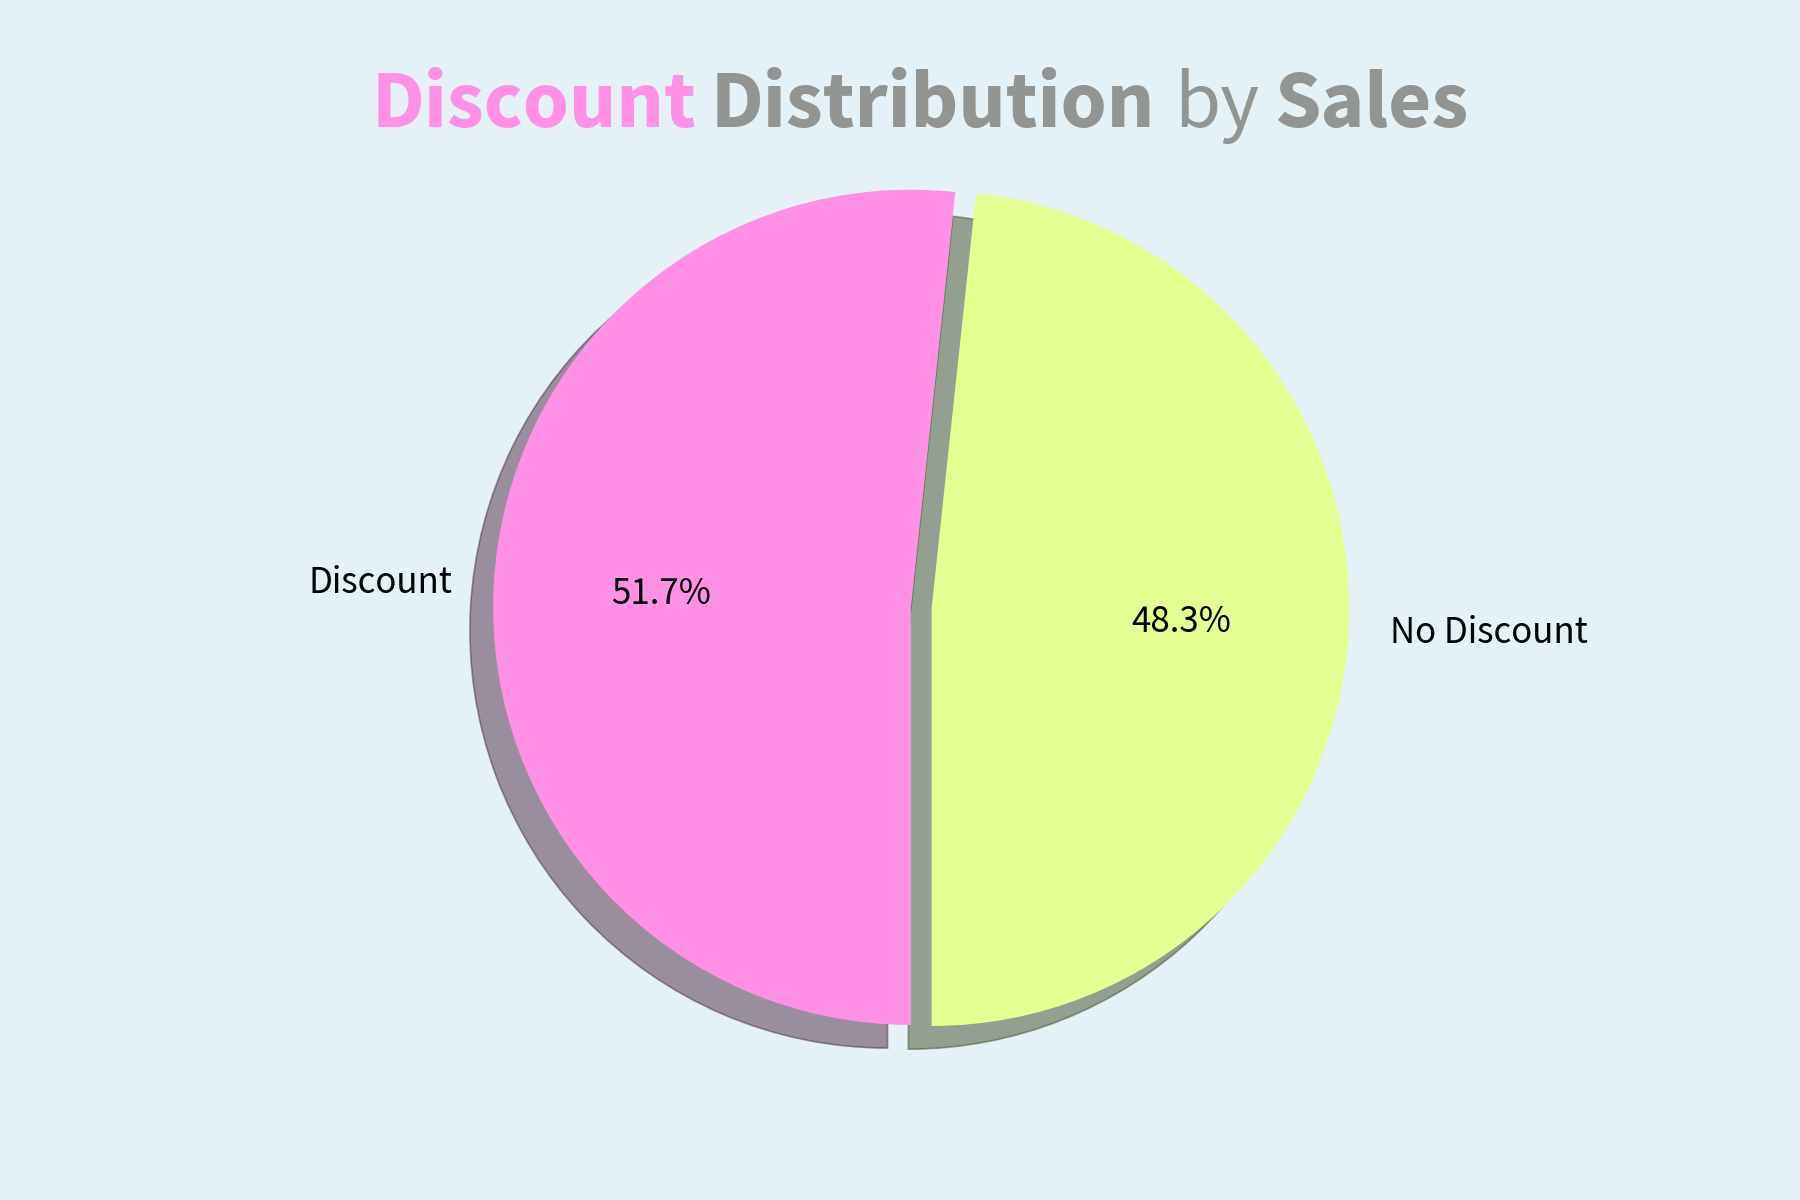

In [27]:
# Discount distribution
discount = train.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

# Visualization
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')

mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')
plt.text(-1.29, 1.15, "Discount", size=30, color="#ff90e4", fontweight="bold")
plt.text(-0.48, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.63, 1.15, "by", size=30, color="grey")
plt.text(0.87, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()

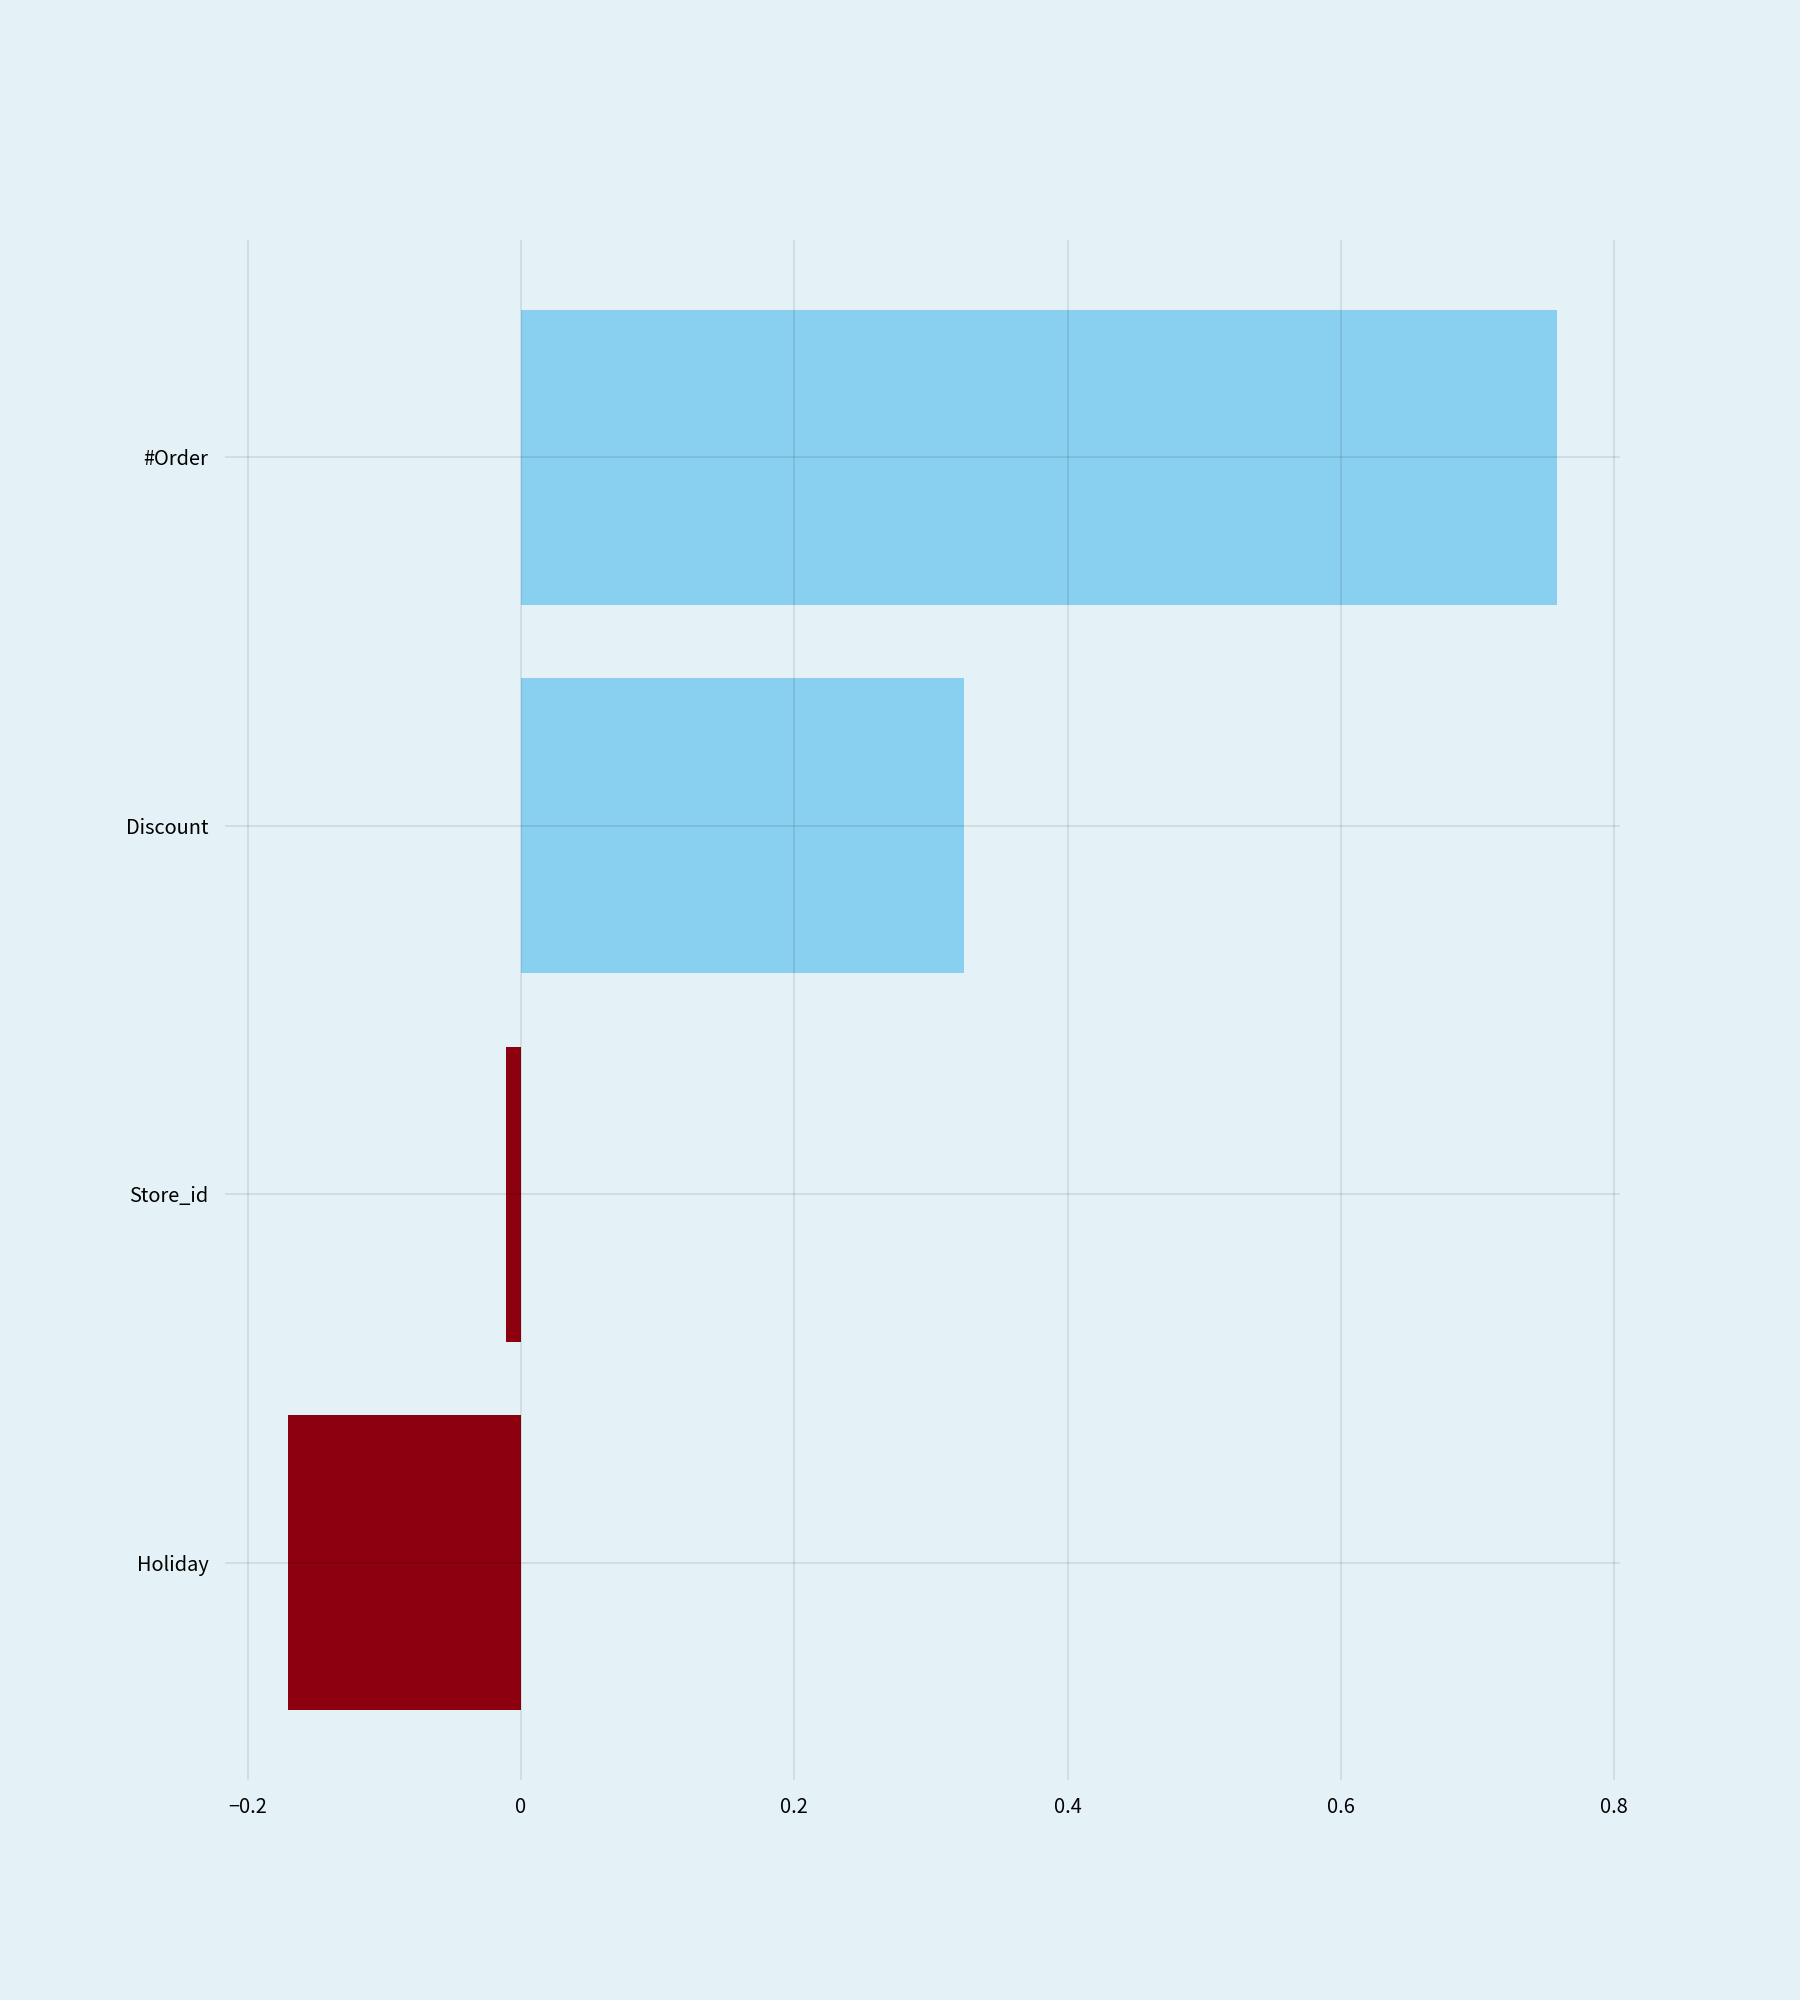

In [82]:
corr = train[train.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 10))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

ax.barh(corr.index, corr.Sales, align='center', color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.text(-0.295, 43, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(-0.055, 43, "of", size=24, color="grey");
plt.text(0, 43, "Sales", size=24, color="crimson", fontweight="bold");

plt.text(0.12, 43, "to", size=24, color="grey");
plt.text(0.17, 43, "Other Features", size=24, color="grey", fontweight="bold");

# Author
plt.text(0.6, -7, "@miguelfzzz", fontsize=11, ha="right", color='grey');

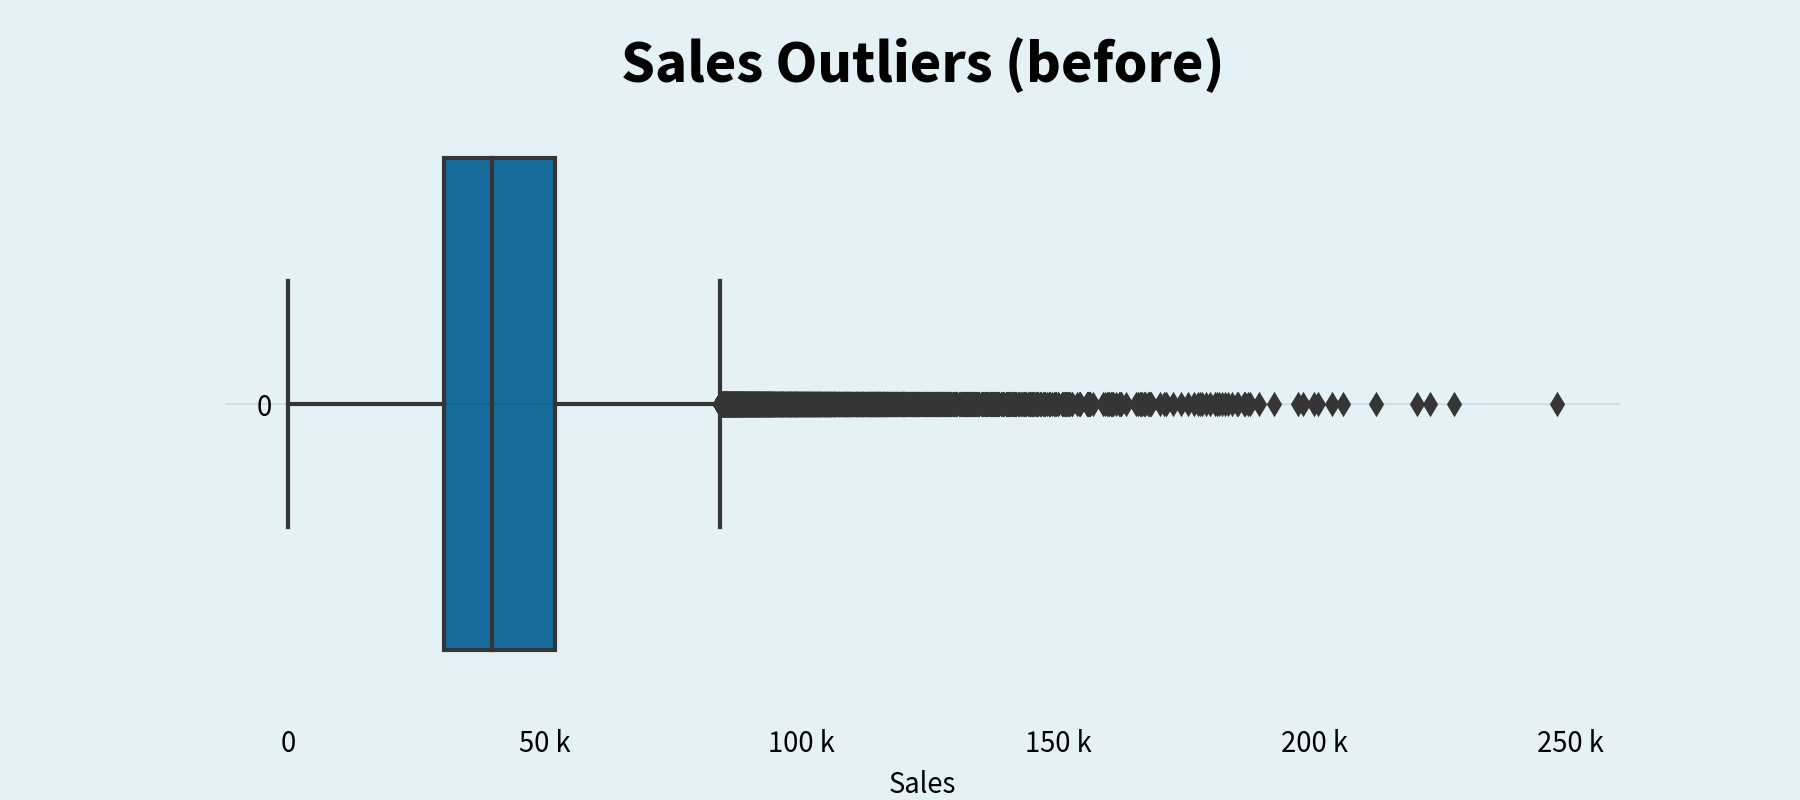

In [77]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train.Sales);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'


plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (before)', size=22, fontweight="bold");


In [78]:
# Dealing with the outliers
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Sales'])
for i in train['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train['Sales'] = train['Sales'].replace(i, med)

# I took the code from this notebook -> https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

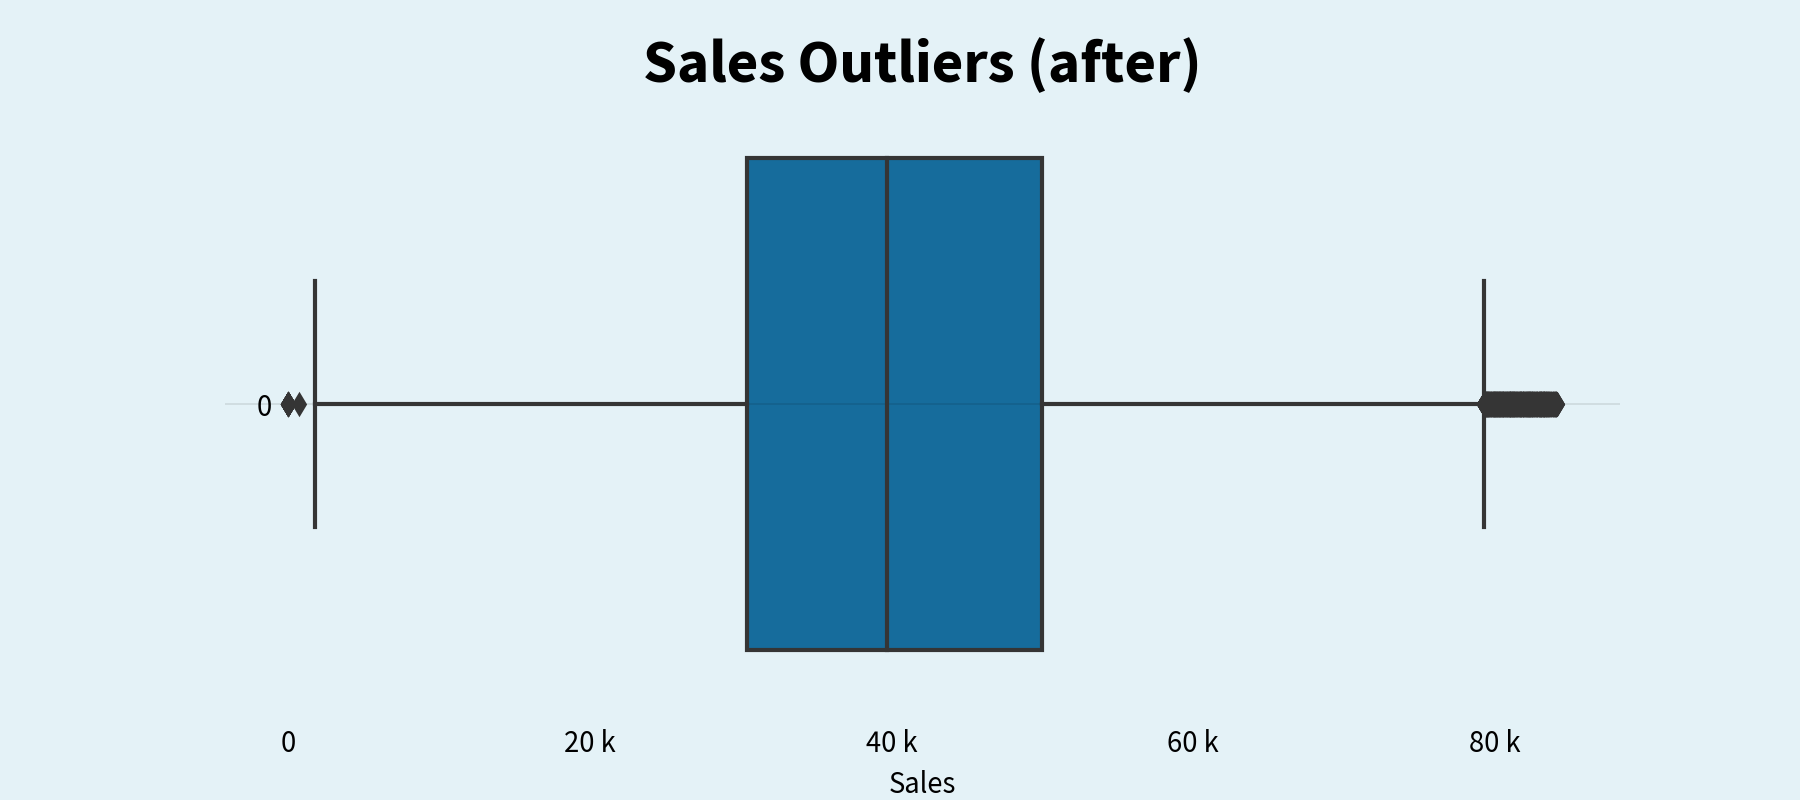

In [79]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
    # Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);
plt.title('Sales Outliers (after)', size=22, fontweight="bold");

In [80]:
# Normalization on Sales
train['Sales'] = MinMaxScaler().fit_transform(np.array(train['Sales']).reshape(-1,1))

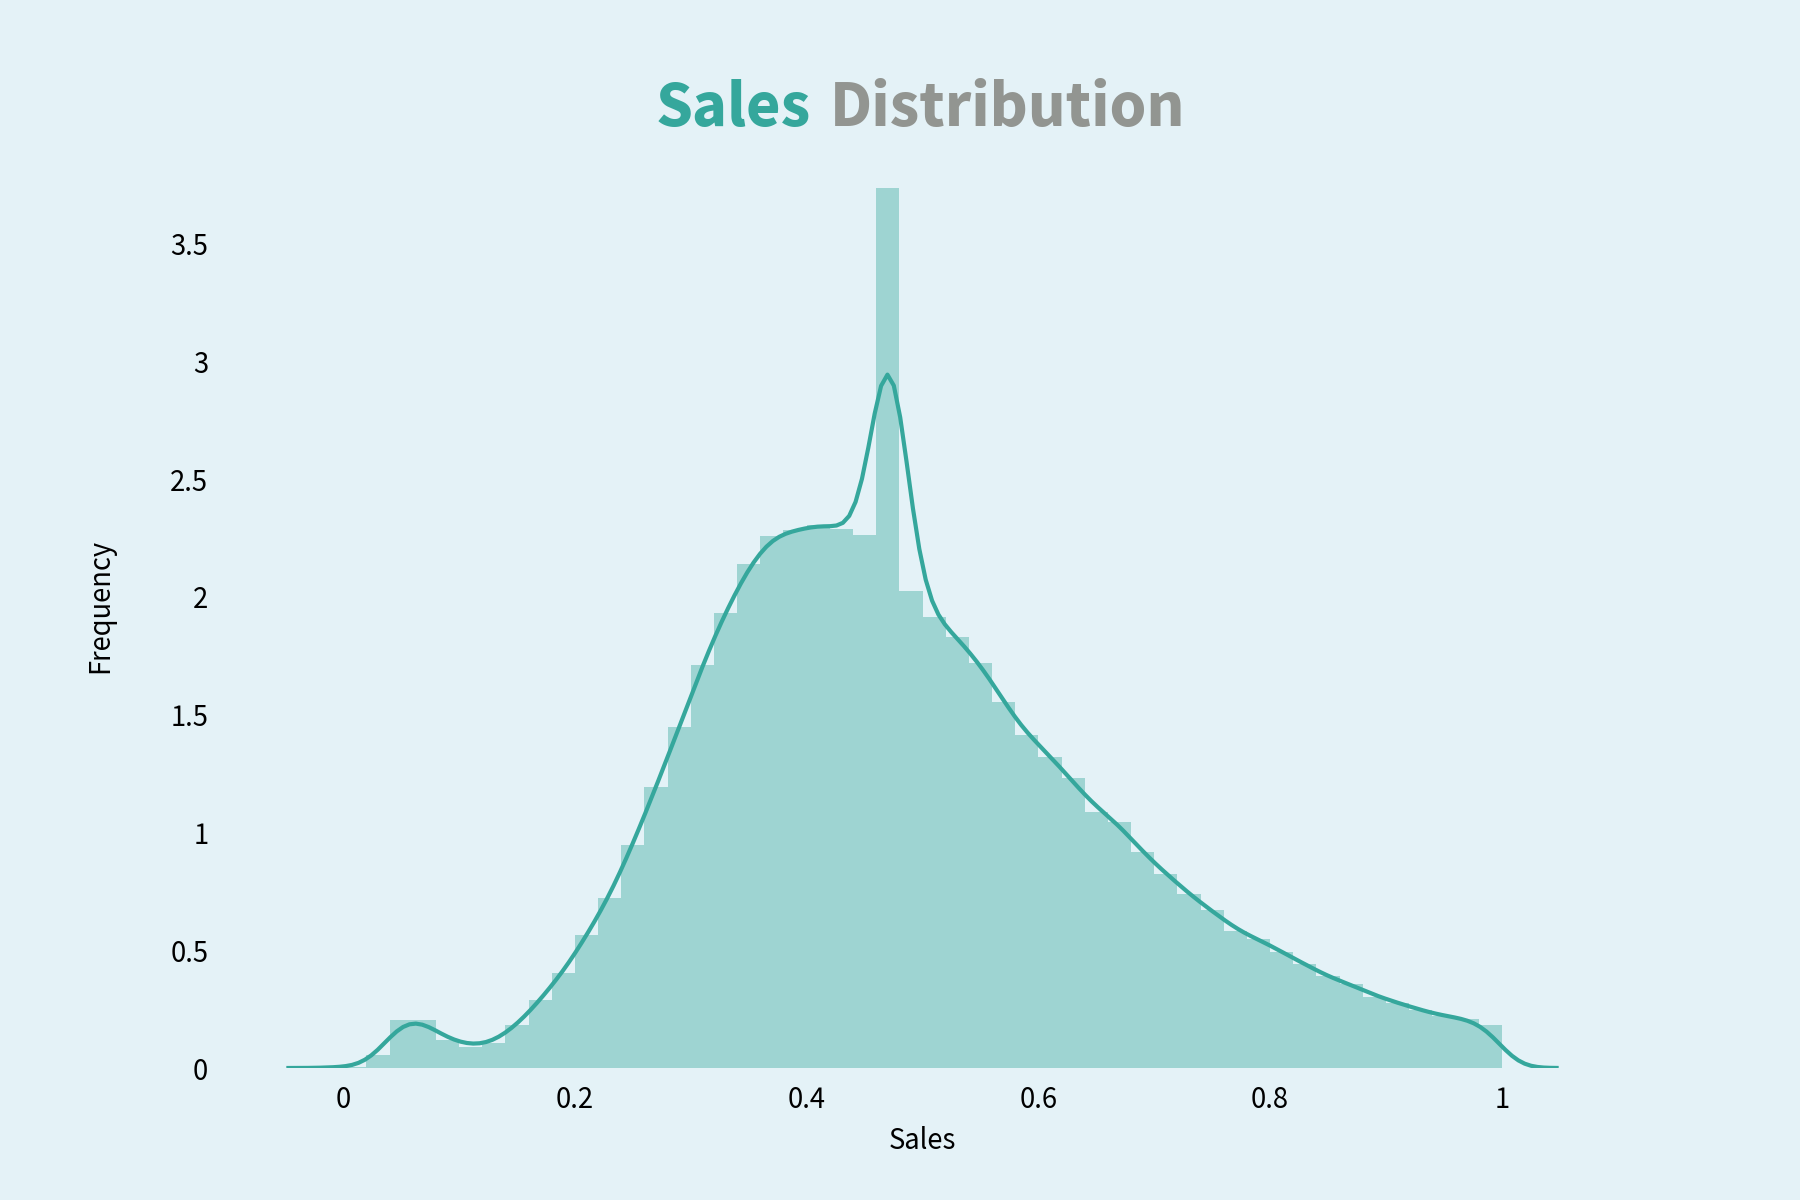

In [81]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.distplot(train['Sales'], color="#35a79c");

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
    # Remove grid
plt.grid(b=None)

# Y axis position

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Sales', fontsize=11)
plt.ylabel('Frequency', fontsize=11, labelpad=20);

plt.text(0.27, 4, "Sales", size=24, color="#35a79c", fontweight="bold");
plt.text(0.42, 4, "Distribution", size=24, color="grey", fontweight="bold");

# Author
plt.text(285000, -3000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [28]:
# Remove "ID" 
train = train.drop('ID', 1)

In [29]:
train[['Store_id','Holiday', 'Discount']] = train[['Store_id', 'Holiday', 'Discount']].astype(int)

In [30]:
stores_df = train[['Store_id', 'Region_Code', 'Location_Type', 'Store_Type']]

In [31]:
x = stores_df.groupby(['Region_Code', 'Location_Type', 'Store_Type'])[['Store_id']].count()
x.columns = ['Num_stores_of_same_store_type_in_region_loc']
x = x.reset_index()
stores_df = pd.merge(stores_df, x, on=['Region_Code', 'Location_Type', 'Store_Type'], how='left')

In [32]:
stores_df.head()

,Store_id,Region_Code,Location_Type,Store_Type,Num_stores_of_same_store_type_in_region_loc
0,1,R1,L3,S1,6708
1,253,R1,L2,S4,17028
2,252,R1,L2,S3,2064
3,251,R1,L3,S2,516
4,250,R4,L3,S2,2580


In [41]:
del train['Month']


In [48]:
all_df = train.append(test).reset_index(drop=True)
all_df.sort_values(['Store_id', 'Date'], inplace=True)
#all_df['YM'] = pd.to_datetime(all_df['Date'].dt.year.astype(str) + "-" + all_df['Date'].dt.month.astype(str))
all_df['Date'] = pd.to_datetime(all_df.Date)
all_df['Month'] = all_df['Date'].apply(lambda x: x.strftime('%b'))
all_df['Year'] = all_df['Date'].apply(lambda x: x.strftime('%Y'))



In [49]:
x = all_df.groupby(['Region_Code', 'Location_Type', 'Store_Type', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_store_loc_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Location_Type', 'Store_Type', 'Date'], how='left')

In [50]:
x = all_df.groupby(['Region_Code', 'Location_Type', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_loc_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Location_Type', 'Date'], how='left')

In [51]:
x = all_df.groupby(['Region_Code', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Date'], how='left')

In [53]:
x = all_df.groupby(['Store_id', 'Month','Year'])[['Discount']].sum()
x.columns = ['discounts_in_month']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Store_id', 'Month','Year'], how='left')

x = all_df.groupby(['Region_Code', 'Location_Type', 'Store_Type', 'Date'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_store_location_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Location_Type', 'Store_Type', 'Date'], how='left')

x = all_df.groupby(['Region_Code', 'Location_Type', 'Month','Year'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_location_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Location_Type', 'Month','Year'], how='left')

x = all_df.groupby(['Region_Code', 'Month','Year'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_region']
x = x.reset_index()
all_df = pd.merge(all_df, x, on=['Region_Code', 'Month','Year'], how='left')

In [54]:
all_df['days_in_next_discount'] = all_df['Date']
all_df.loc[all_df['Discount'] == 0, 'days_in_next_discount'] = np.nan
all_df['days_in_next_discount'] = all_df.groupby(['Store_id'])['days_in_next_discount'].shift(-1).fillna(method='bfill')
all_df['days_in_next_discount'] = (all_df['days_in_next_discount'] - all_df['Date']).dt.days
all_df.loc[all_df['days_in_next_discount'] <=0, 'days_in_next_discount'] = -1

In [55]:
all_df['days_in_previous_discount'] = all_df['Date']
all_df.loc[all_df['Discount'] == 0, 'days_in_previous_discount'] = np.nan
all_df['days_in_previous_discount'] = all_df.groupby(['Store_id'])['days_in_previous_discount'].shift(1).fillna(method='ffill')
all_df['days_in_previous_discount'] = (all_df['Date'] - all_df['days_in_previous_discount']).dt.days
all_df.loc[all_df['days_in_previous_discount'] <=0, 'days_in_previous_discount'] = -1

In [56]:
all_df['days_in_next_discount'].fillna(-1, inplace=True)
all_df['days_in_previous_discount'].fillna(-1, inplace=True)

In [58]:
del all_df['ID']
all_df.head()


,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year,num_stores_with_disc_in_same_store_loc_region,num_stores_with_disc_in_same_loc_region,num_stores_with_disc_in_same_region,discounts_in_month_x,discounts_in_month_y,discounts_in_month_same_store_location_region,discounts_in_month_same_location_region,discounts_in_month_same_region,days_in_next_discount,days_in_previous_discount
0,1,S1,L3,R1,2018-01-01,1,1,9.0,7011.84,Jan,2018,13,17,124,15,15,13,255,1858,1.0,-1.0
1,1,S1,L3,R1,2018-01-02,0,1,60.0,42369.00,Jan,2018,13,17,124,15,15,13,255,1858,1.0,1.0
2,1,S1,L3,R1,2018-01-03,0,1,72.0,50037.00,Jan,2018,13,17,124,15,15,13,255,1858,1.0,1.0
3,1,S1,L3,R1,2018-01-04,0,1,64.0,44397.00,Jan,2018,13,17,124,15,15,13,255,1858,1.0,1.0
4,1,S1,L3,R1,2018-01-05,0,1,63.0,47604.00,Jan,2018,13,17,124,15,15,13,255,1858,8.0,1.0


In [59]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales rolling mean features
def create_sales_rmean_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                             shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmean', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).mean().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales rolling median features
def create_sales_rmed_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                            shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmed', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).median().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [60]:
# # Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
all_df = create_sales_lag_feats(all_df, gpby_cols=['Store_id'], target_col='Sales', 
                               lags=[61,62,63,64,65,66,67,74,80])

all_df = create_sales_ewm_feats(all_df, gpby_cols=['Store_id'], 
                               target_col='Sales', 
                               alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                               shift=[61,62,63,64,65,66,67,74,80])

In [61]:
all_df = create_sales_ewm_feats(all_df, gpby_cols=['Store_id'], 
                               target_col='#Order', 
                               alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                               shift=[61,62,63,64,65,66,67,74,80])

In [62]:
all_df.shape

(210605, 138)

In [63]:
all_df.tail()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year,num_stores_with_disc_in_same_store_loc_region,...,#Order_lag_67_ewm_0.6,#Order_lag_74_ewm_0.6,#Order_lag_80_ewm_0.6,#Order_lag_61_ewm_0.5,#Order_lag_62_ewm_0.5,#Order_lag_63_ewm_0.5,#Order_lag_64_ewm_0.5,#Order_lag_65_ewm_0.5,#Order_lag_66_ewm_0.5,#Order_lag_67_ewm_0.5,#Order_lag_74_ewm_0.5,#Order_lag_80_ewm_0.5
210600,365,S2,L1,R2,2019-07-27,0,No,NaN,NaN,Jul,2019,NoNoNo,...,47.167369,52.427510,49.966283,54.554360,54.108720,50.217439,45.434878,38.869756,47.739513,47.479026,52.315313,51.180014
210601,365,S2,L1,R2,2019-07-28,0,No,NaN,NaN,Jul,2019,NoNoNo,...,47.666948,59.971004,48.186513,62.277180,54.554360,54.108720,50.217439,45.434878,38.869756,47.739513,58.657656,49.090007
210602,365,S2,L1,R2,2019-07-29,0,No,NaN,NaN,Jul,2019,NoNoNo,...,37.066779,67.188402,51.074605,46.638590,62.277180,54.554360,54.108720,50.217439,45.434878,38.869756,65.328828,51.045004
210603,365,S2,L1,R2,2019-07-30,0,No,NaN,NaN,Jul,2019,NoNoNo,...,46.026712,48.475361,44.429842,45.819295,46.638590,62.277180,54.554360,54.108720,50.217439,45.434878,50.664414,45.522502
210604,365,S2,L1,R2,2019-07-31,0,No,NaN,NaN,Jul,2019,NoNoNo,...,51.410685,43.990144,53.171937,44.909647,45.819295,46.638590,62.277180,54.554360,54.108720,50.217439,45.832207,52.261251


In [66]:
all_df['Sales_log'] = np.log(all_df['Sales'].replace(0,1))
all_df['#Order_log'] = np.log(all_df['#Order'].replace(0,1))

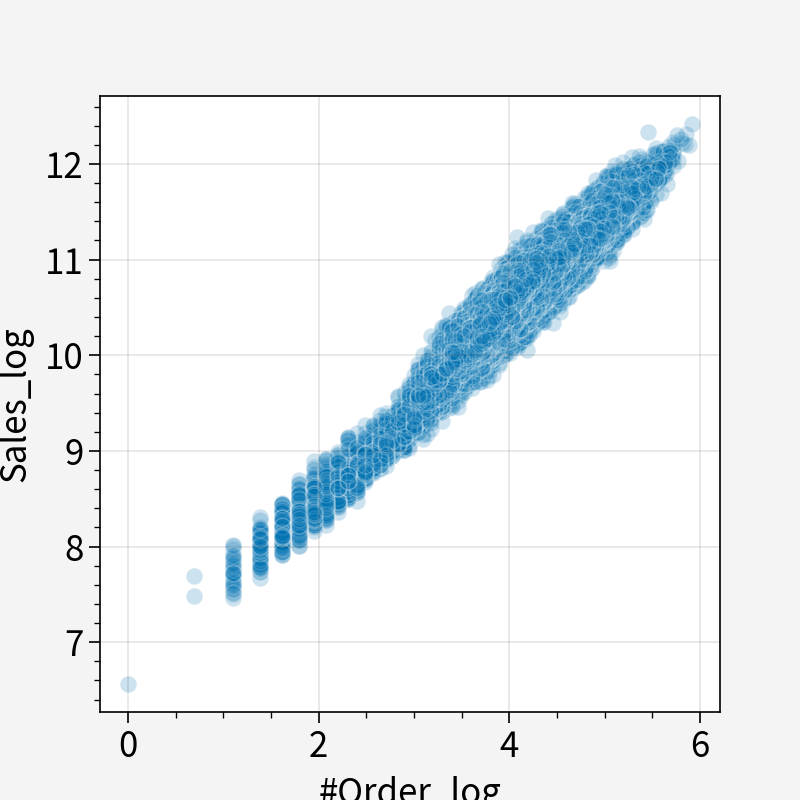

In [68]:
sns.scatterplot(all_df[all_df['Sales'] >0]['#Order_log'], all_df[all_df['Sales'] >0]['Sales_log'], alpha=0.2);

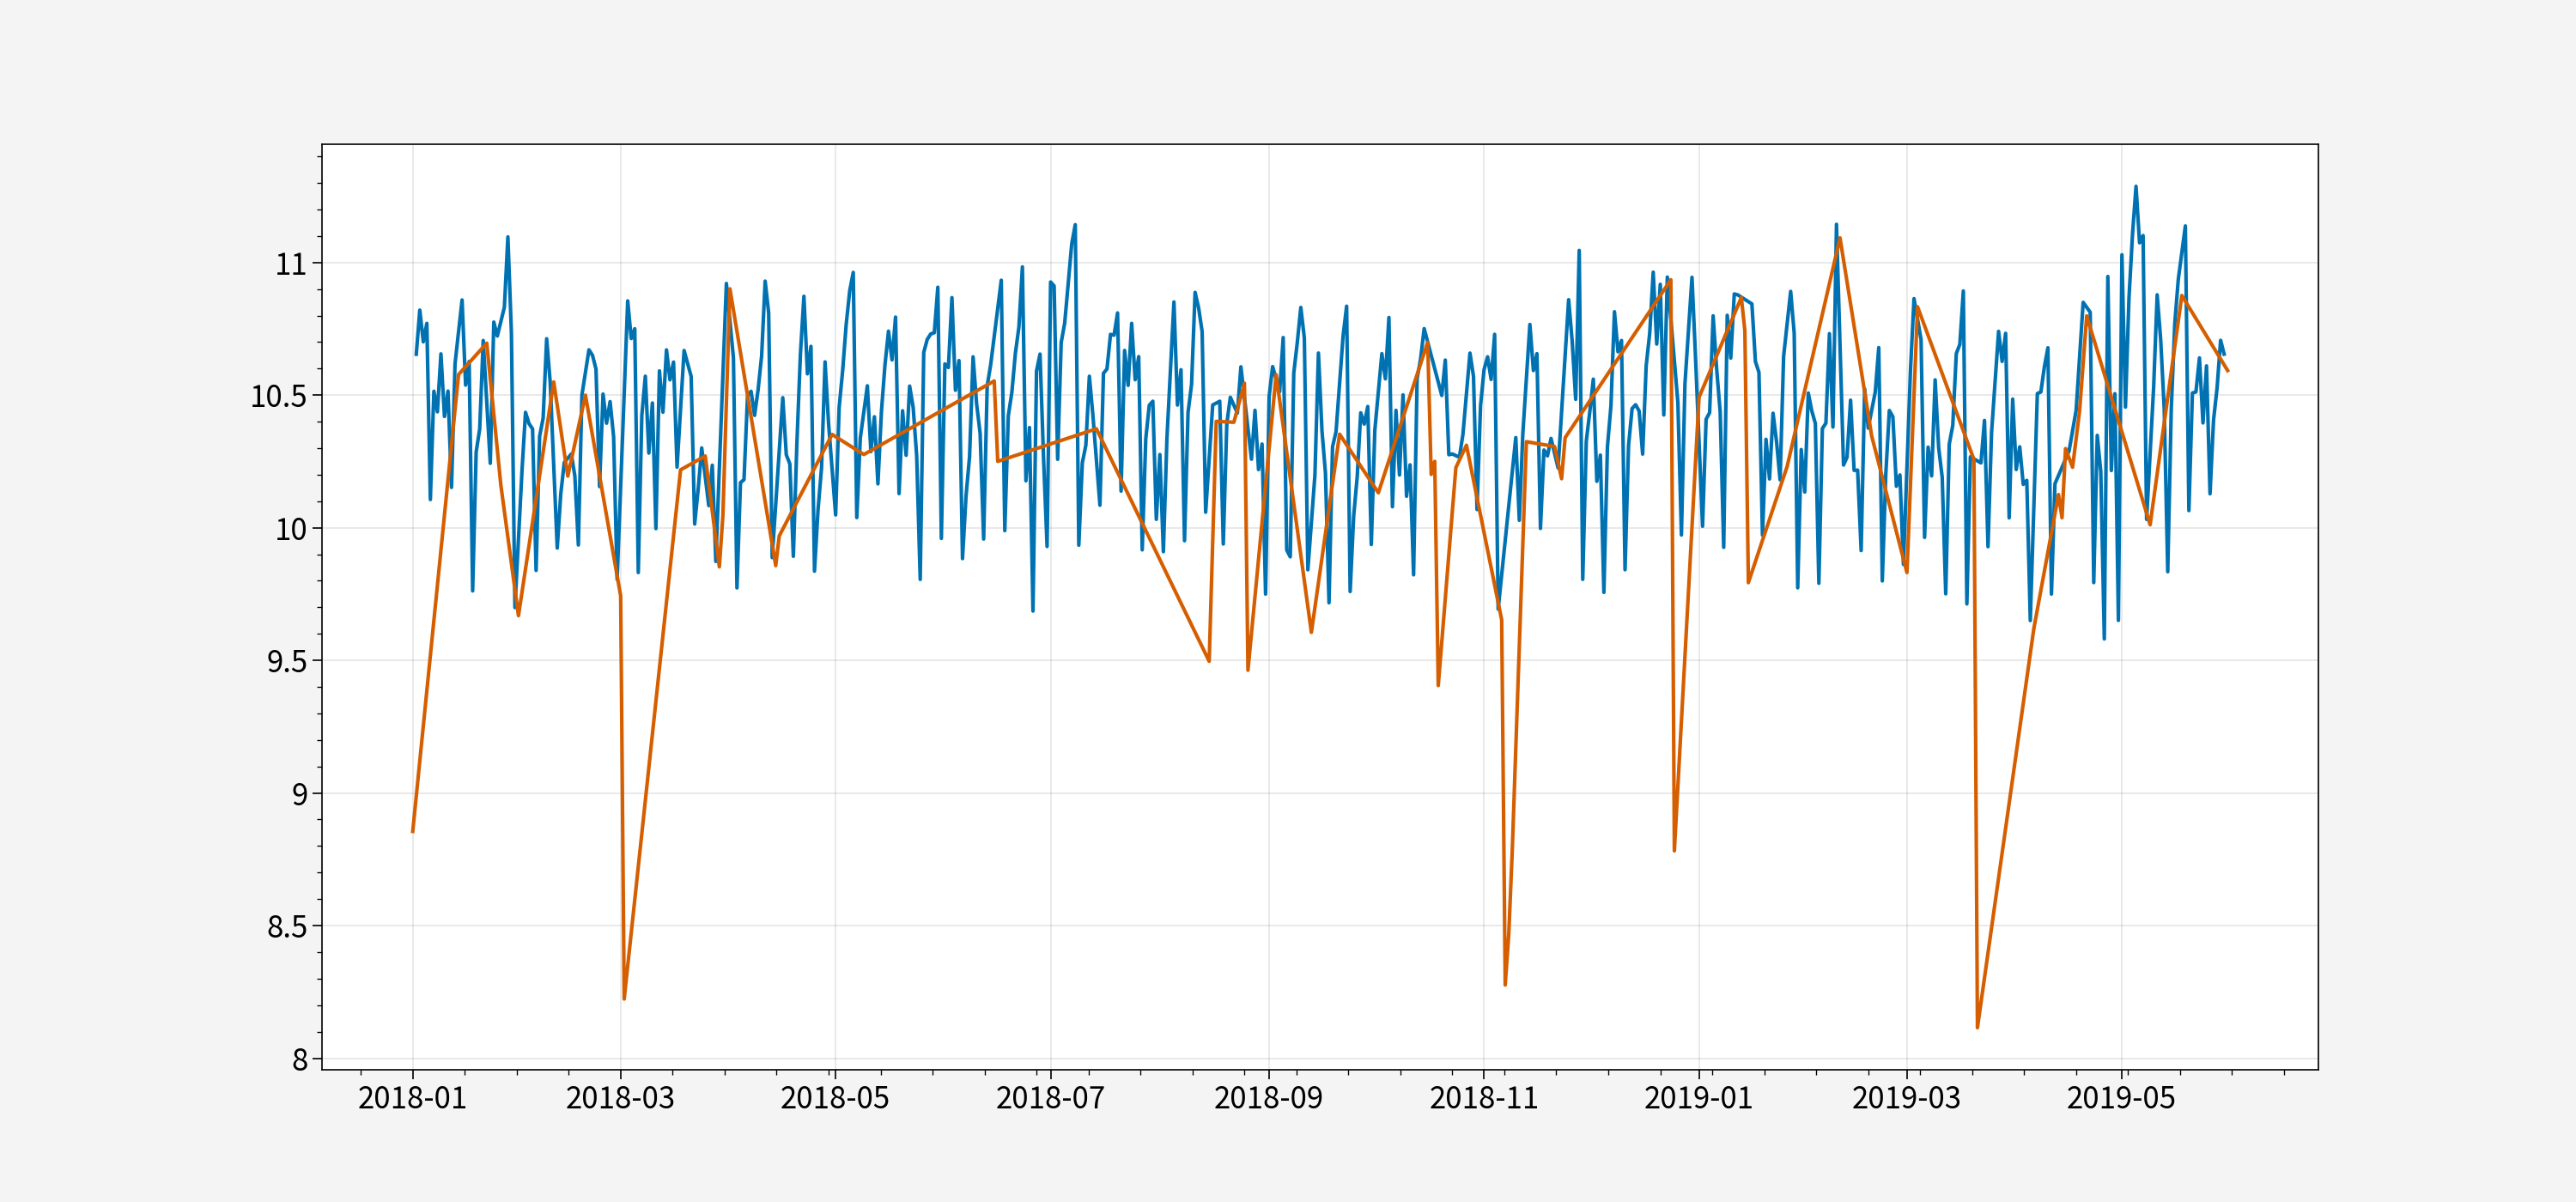

In [70]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 0)]['Date'], all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 0)]['Sales_log'])
plt.plot(all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 1)]['Date'], all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 1)]['Sales_log'])
plt.show()

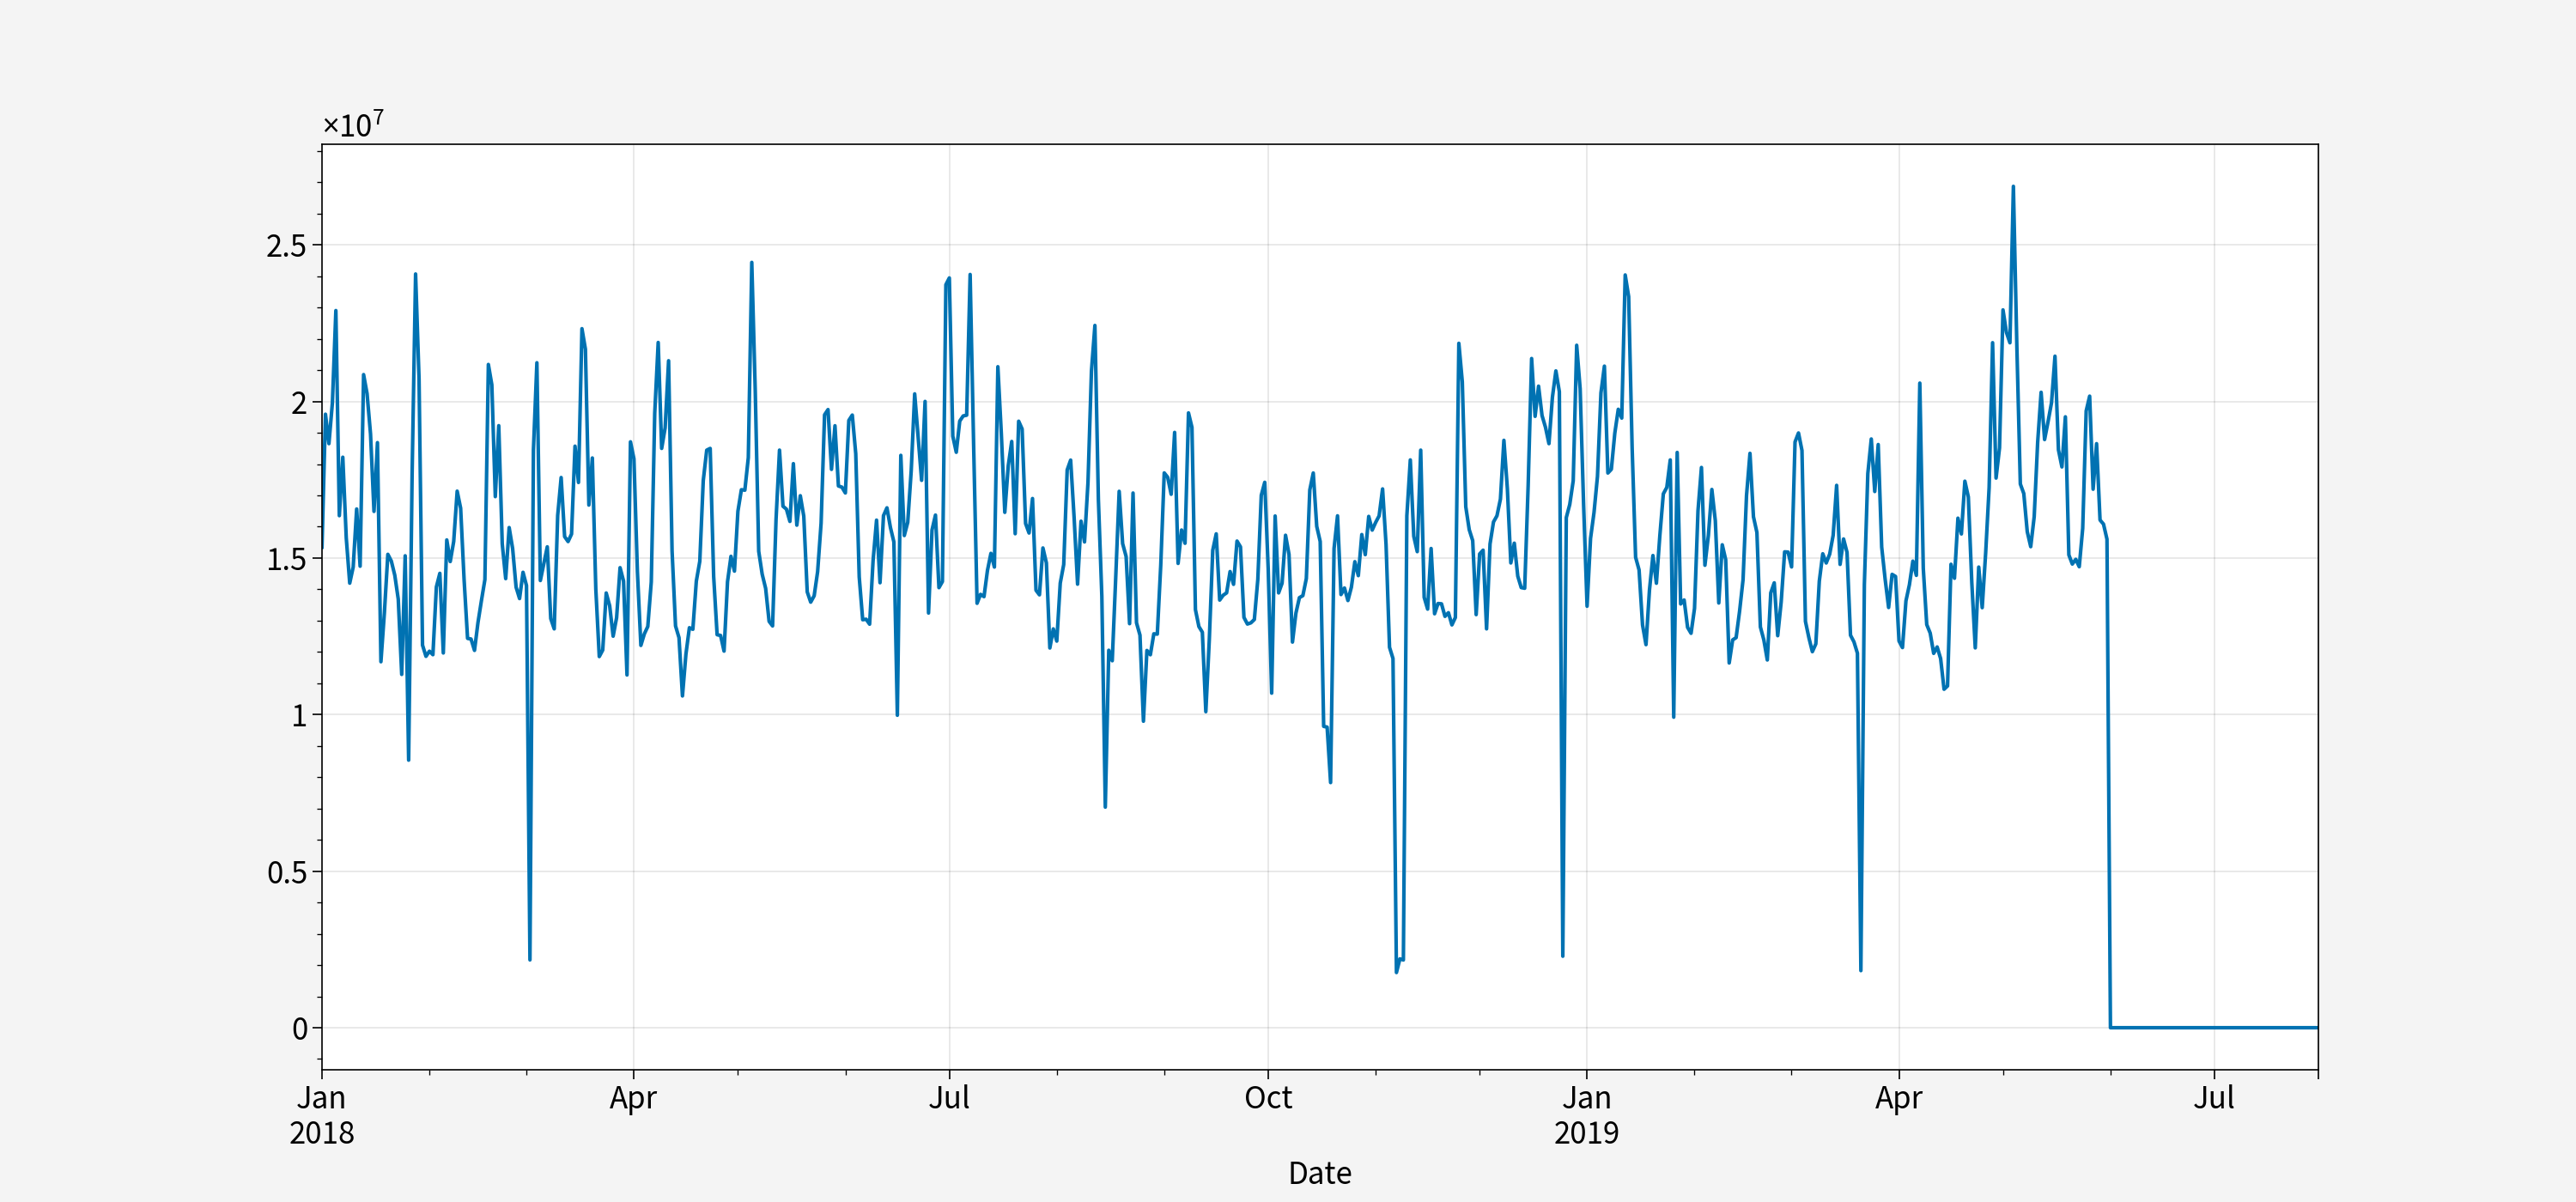

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
all_df.groupby('Date')['Sales'].sum().plot();


In [73]:
x = all_df.sort_values(['Store_id', 'Date'])

In [74]:
x['sales_rol_mean'] = x.groupby(['Store_id']).shift(61).rolling(window=28, min_periods=1)['Sales_log'].mean().values
x.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year,num_stores_with_disc_in_same_store_loc_region,...,#Order_lag_61_ewm_0.5,#Order_lag_62_ewm_0.5,#Order_lag_63_ewm_0.5,#Order_lag_64_ewm_0.5,#Order_lag_65_ewm_0.5,#Order_lag_66_ewm_0.5,#Order_lag_67_ewm_0.5,#Order_lag_74_ewm_0.5,#Order_lag_80_ewm_0.5,Sales_log,#Order_log,sales_rol_mean
0,1,S1,L3,R1,2018-01-01,1,1,9.0,7011.84,Jan,2018,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.855355,2.197225,NaN
1,1,S1,L3,R1,2018-01-02,0,1,60.0,42369.00,Jan,2018,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.654172,4.094345,NaN
2,1,S1,L3,R1,2018-01-03,0,1,72.0,50037.00,Jan,2018,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.820518,4.276666,NaN
3,1,S1,L3,R1,2018-01-04,0,1,64.0,44397.00,Jan,2018,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.700927,4.158883,NaN
4,1,S1,L3,R1,2018-01-05,0,1,63.0,47604.00,Jan,2018,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.770672,4.143135,NaN


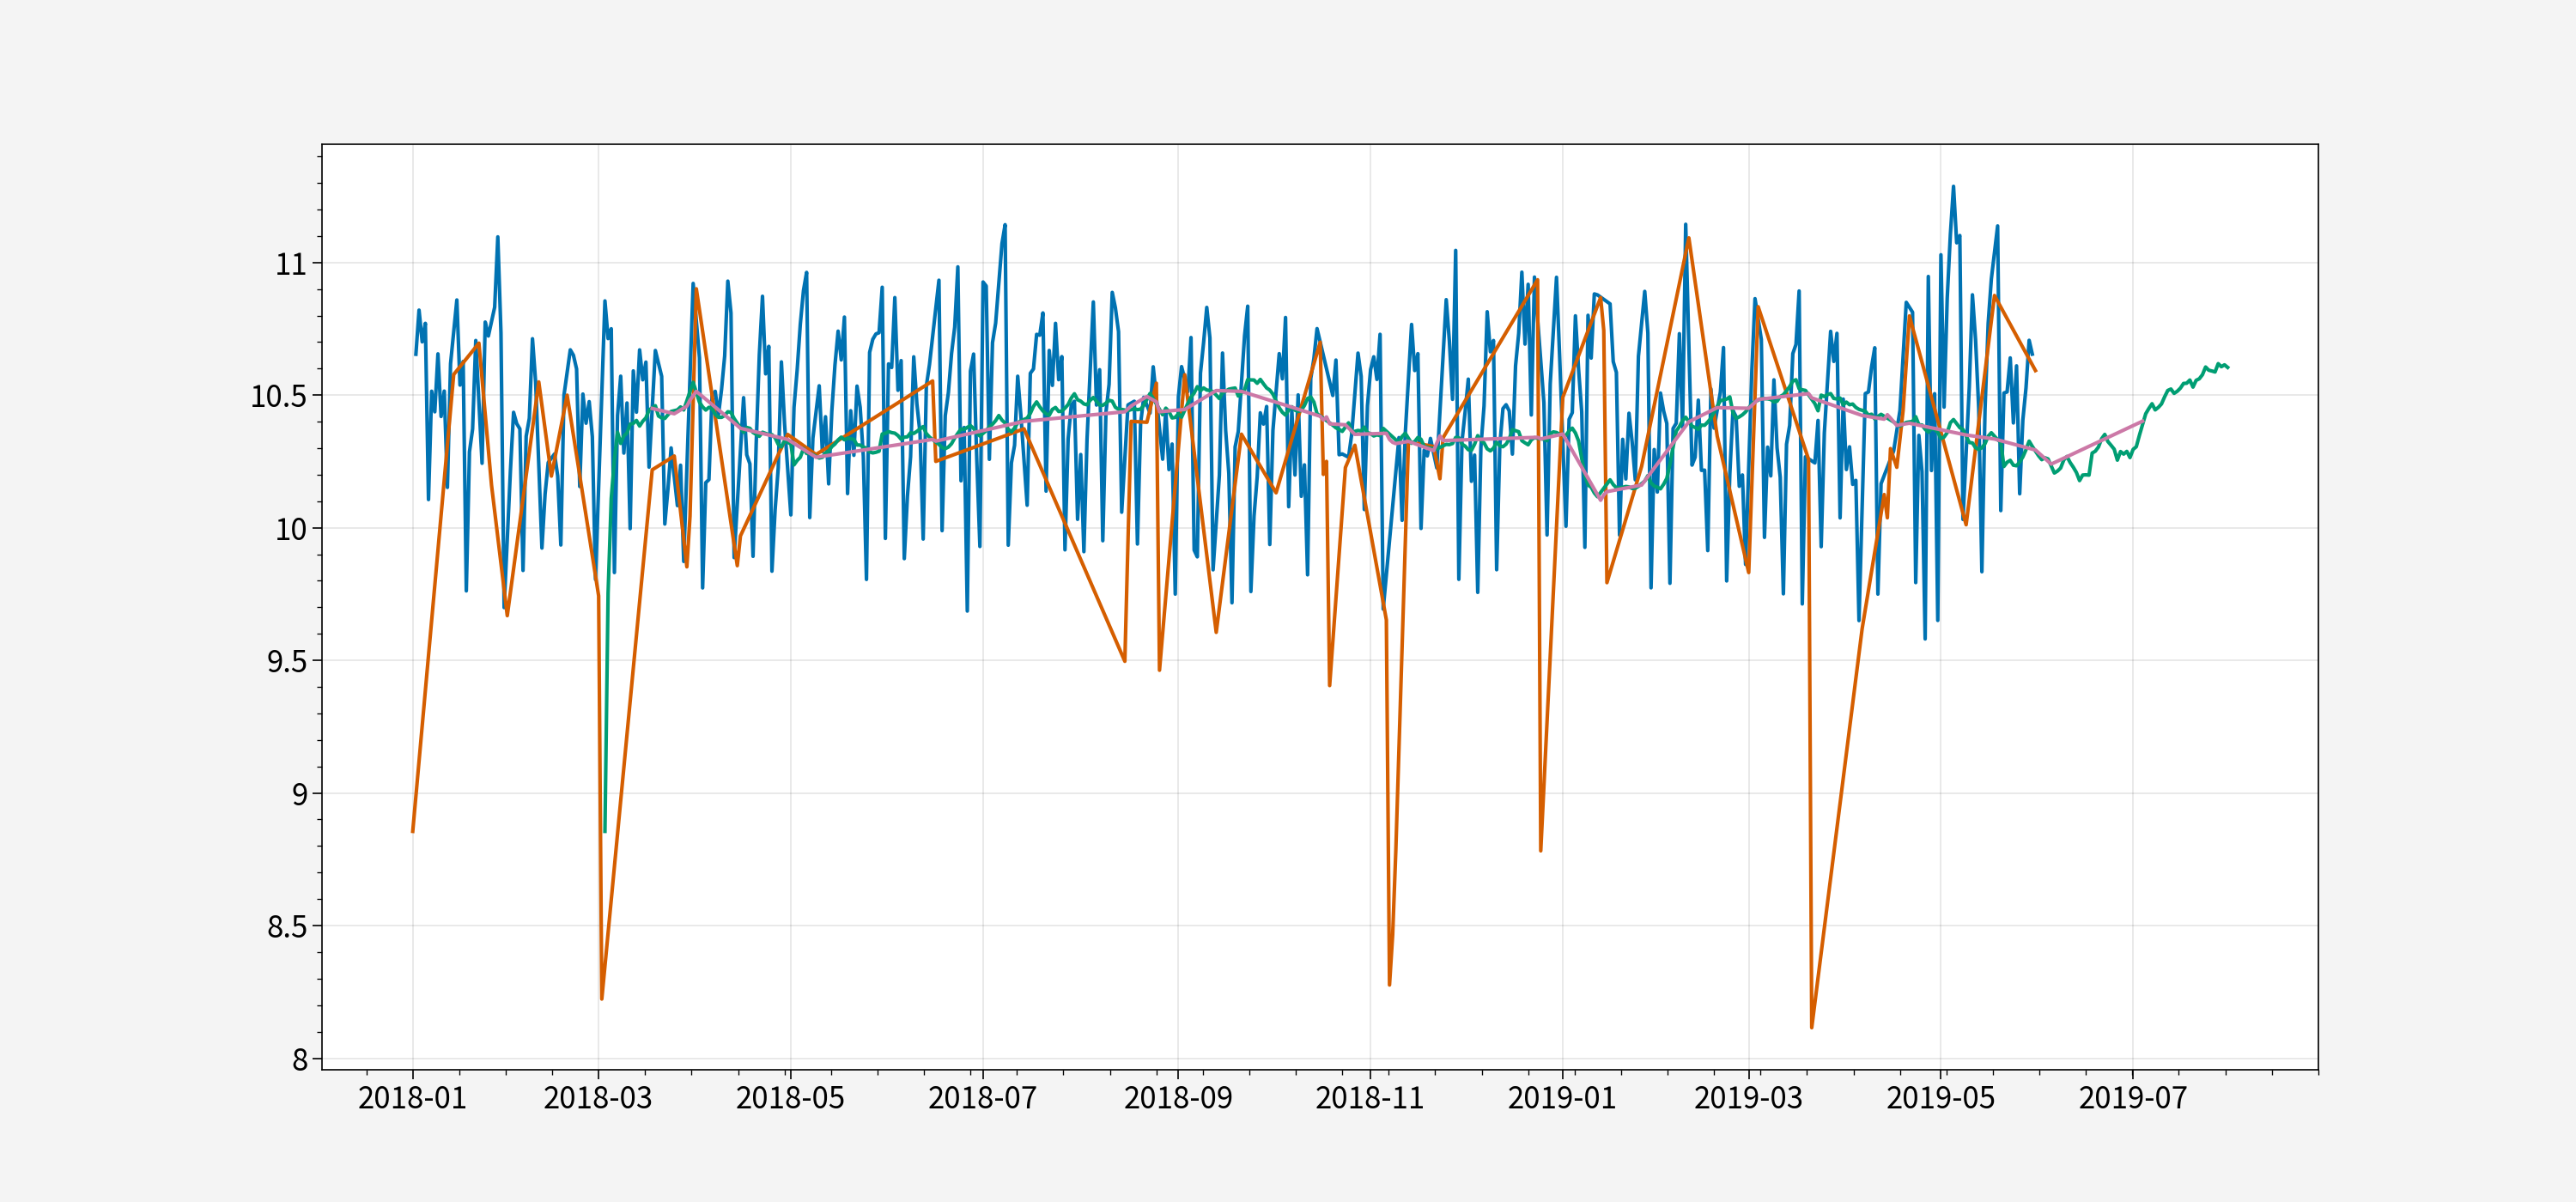

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 0)]['Date'], all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 0)]['Sales_log'])
plt.plot(all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 1)]['Date'], all_df[(all_df['Store_id']==1) & (all_df['Holiday'] == 1)]['Sales_log'])

plt.plot(x[(x['Store_id']==1) & (x['Holiday'] == 0)]['Date'], x[(x['Store_id']==1) & (x['Holiday'] == 0)]['sales_rol_mean'])
plt.plot(x[(x['Store_id']==1) & (x['Holiday'] == 1)]['Date'], x[(x['Store_id']==1) & (x['Holiday'] == 1)]['sales_rol_mean'])

plt.show()

Modelling and Accuracy to be updated soon...